<a href="https://colab.research.google.com/github/armandossrecife/my_validation/blob/main/My_KLSATD_Commits_and_my_Issues_from_Cassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de ATD do Repositório do Cassandra

Dada uma lista de **classes críticas** identificadas pelo método ATDCodeAnalyzer (https://github.com/mining-software-repositories/cassandra), checa se estas classes estão relacionadas a commits dos issues com  architectural issues.

A validação será feita por meio de métodos de SATD nos commits e nos issues do repositório.

Logo abaixo seguem os passos da validação:

1. Instala dependências e bibliotecas para execução dos scripts

2. Funções e classes de apoio para análise de commits, issues e SATD

3. Clona o repositório para análise

4. Keywords de acordo com a literatura em SATD e KL SATD.

5. Análise dos commits

6. Análise dos issues

7. Análise dos commits com SATD keywords e arquivos críticos e issues relacionados

8. Validação dos arquivos críticos junto aos issues selecionados

Obs: tempo de execução: ~1 hora

# Passos do experimento SATD em commits, issues com Classes Críticas (by ATDCodeAnalyzer)

Análise de SATD das mensagens e diffs de commits, bem como análise dos conteúdos de summary, description e comments de issues registrados em commits



1.   Definir o conjunto de keywords da literatura e KL SATD

2.   Fazer a análise de keywords para as mensagens dos commits e os diffs dos commits
-  Filtrar apenas os commits que possuam as classes críticas (by ATDCodeAnalyzer)

3.   Fazer a análise de keywords para os issues que são registrados nos commits para os summary, description e comments
- Filtrar apenas os issues com commits que possuam as classes críticas (by ATDCodeAnalyzer)

## My SATD Analyzer

Describe the steps to analyze commits and issues with SATD keywords

1. Identify Keywords for Self-Admitted Technical Debt (SATD):
Start by identifying keywords or phrases that commonly indicate self-admitted technical debt. These keywords can be derived from literature or based on your understanding of common terms used in code comments, commit messages, and issue descriptions. For example, common keywords may include "TODO," "FIXME," "refactor," "technical debt," "hack," "workaround," etc.

2. Create a Dictionary of SATD Keywords:
Build a dictionary or a set of SATD keywords that will serve as the basis for content queries in commit messages, modified file comments, and issue descriptions. This dictionary should include the keywords identified in Step 1.

3. Using PyDriller for Commit Analysis:
You can use PyDriller to analyze commits from the repository. PyDriller is a Python library for analyzing Git repositories. Install it using pip.
Create Python scripts that use PyDriller to iterate through the commits and identify those that contain SATD keywords in their messages. You can filter commits based on these keywords and store them in a Set.

4. Analyze Modified Files in Commits:
For each commit, extract the list of modified files. Open and analyze these files to check for SATD keywords in the code comments within the modified lines. Store the commits with modified files containing SATD in a separate Set.

5. Retrieve Issues from the Issue Tracker:
Utilize an API or libraries like JIRA's REST API to fetch issues from the issue tracker (JIRA in this case). For example, you can use Python's requests library to interact with the JIRA API. Query issues based on project (e.g., CASSANDRA) and extract the content of the Summary, Description, and Comments fields for each issue.

## My Validation

As previously outlined, the ATDCodeAnalyzer approach introduced in this thesis aims to automatically identify source code artifacts affected by ATD. This approach distinguishes itself from previous methods by operating autonomously, obviating the requirement for expert analysis in software architecture within the context of the analyzed repository. Therefore, following the application of the ATDCodeAnalyzer, our objective is to determine the extent to which the identified critical files are genuinely influenced by architectural issues and technical debt. To achieve this, we have devised a qualitative validation method to assess the efficacy of our proposed approach.

**A - Software Artifacts Collection and ATDCodeAnalyzer**: The process begins by extracting information from the repository and executing the ATDCodeAnalyzer to identify Critical Files based on our proposed approach.

**B - Commit Analysis**: The modified files are analyzed based on the range and select only the commits that have critical files identified by ATDCodeAnalyzer.

**C - Issue Tracker Analysis**: This phase is related to the process of extracting information from all issues from the issue tracker, recording information about fields related to each issue in the analyzed repository.

**D - SATD Analysis**: This phase is related to extracting SATD keywords from commits in the repository. In this phase, it selects commits that have SATD keywords in messages and the diff of modified files

**F - Select Issues for Inspection**: During this phase, issues are selected for manual inspection to check if these issues have architectural problems.

**G - Inspection Aided by ChatGPT**: In this phase, we use ChatGPT to aid in the analysis of each issue to determine if the issue has architectural problems and save the justification for each inspection.

**H - Issues with Architectural Problems**: Finally, in this last phase, we calculate the percentage of issues that do or do not have architectural problems to validate if the Critical files identified by ATDCodeAnalyzer have architectural issues.


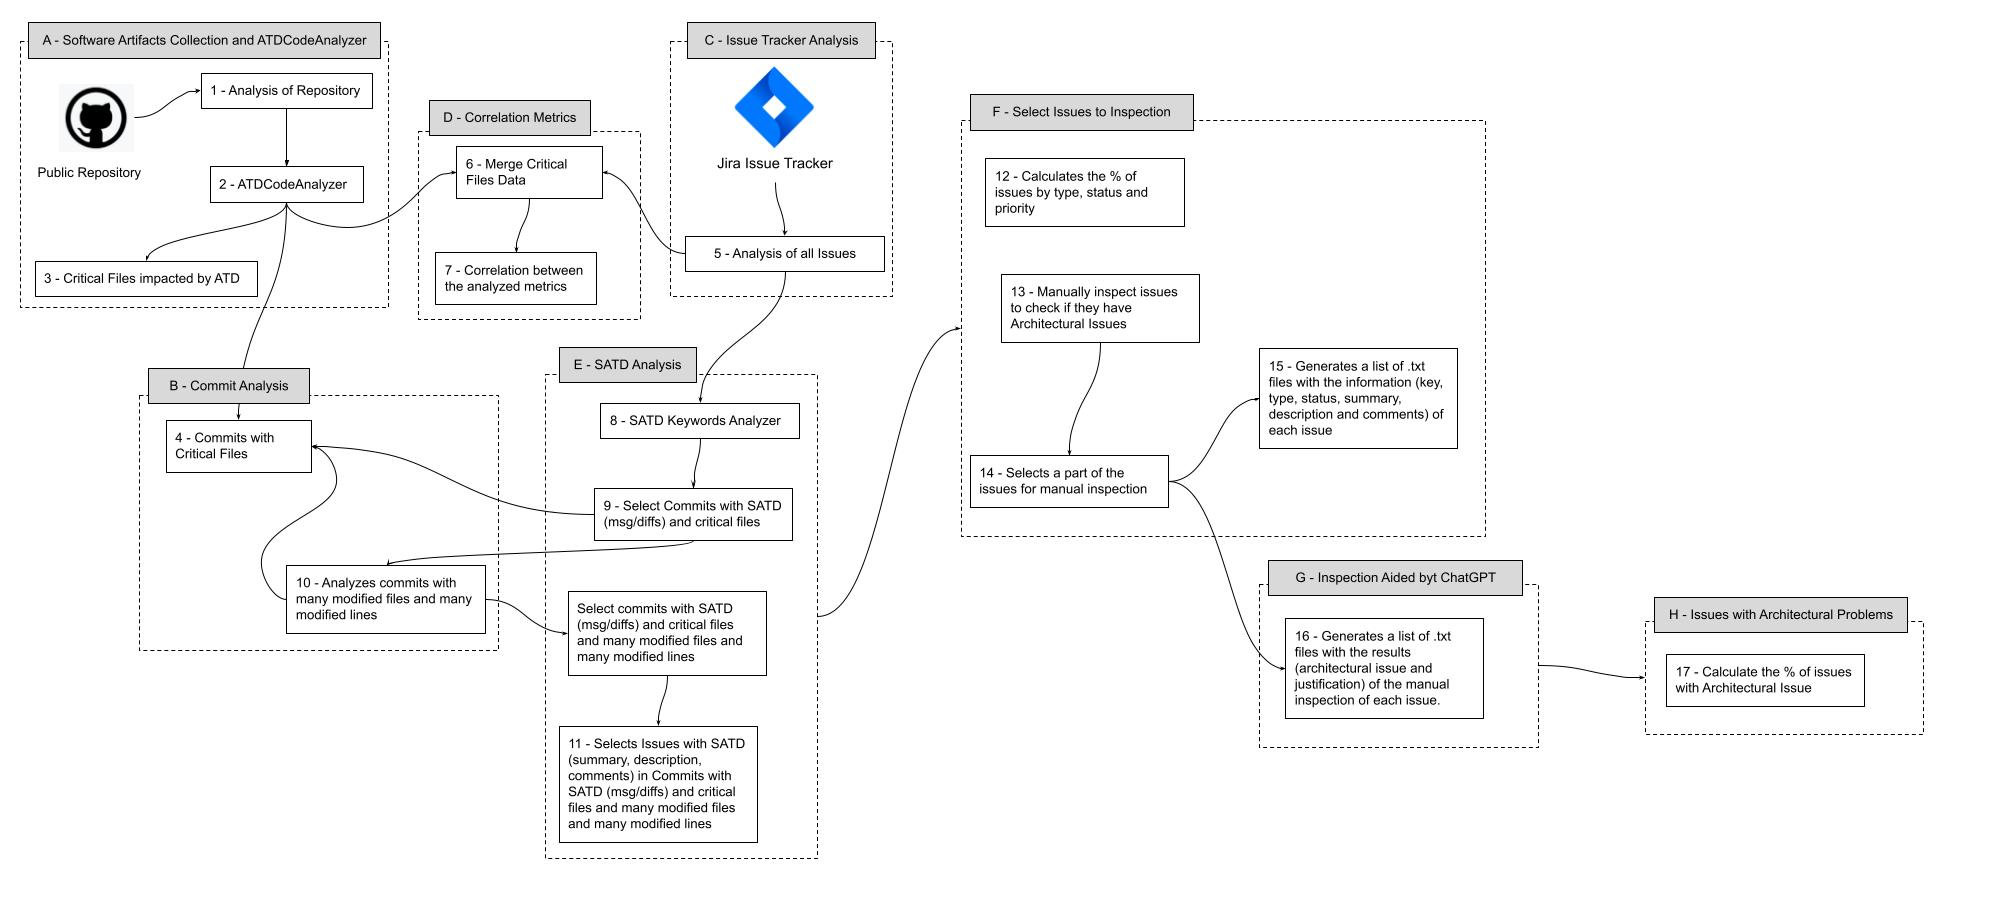

# Variáveis especiais

In [2]:
# 1. Quantidade total de commits analisados faixa from x to y
ve_lista_com_todos_os_commits = []
ve_qtd_total_commits = 0

#2. Quantidade de commits com arquivos críticos
ve_lista_commits_com_arquivos_criticos = []
ve_qtd_commits_com_arquivos_criticos = 0

#3. Quantidade total de issues analisados
ve_lista_com_todos_os_issues = []
ve_qtd_total_issues = 0

# 4. Correlação entre as métricas analisadas
#4.1 Merge dos dados (commits e issues) dos arquivos críticos (8) - r4
#4.2 Diagrama de Correlação (9) - r5

#5. Quantidade total de issues
ve_lista_com_todos_issues = []
ve_qtd_total_issues = 0

#5.1 Issues que aparecem nos commits
ve_lista_com_issues_e_nos_commits = []
ve_qtd_issues_e_nos_commits = 0

#5.1 Issues que aparecem nos commits com arquivos críticos
ve_lista_com_issues_e_nos_commits_com_arquivos_criticos = []
ve_qtd_issues_e_nos_commits_com_arquivos_criticos = 0

#6. Quantidade de commits que possuem SATD keywords
#6.1 Commits com keywords
ve_lista_com_todos_commits_com_keywords = []
ve_qtd_total_commits_com_keywords = 0

# 6.2 Commits com keywords e arquivos criticos
ve_lista_com_commits_com_arquivos_criticos_com_keywords = []
ve_qtd_commits_com_arquivos_criticos_com_keywords = 0

# 1. Install the dependencies

- Pydriller
- GitPython
- JiraPython
- SQLite

In [3]:
print('Install Pydriller.')
!pip install pydriller > install_pydriller.log
print('Install gitpython.')
!pip3 install gitpython > install_gitpython.log
print('Install Jira Python lib.')
!pip install jira > install_jira_python.log
print('Install SQLite in Linux')
!sudo apt install -y sqlite3 > install_sqlite.log
print('All depenpencies installed!')
!cat *.log > install.log
print('Details in install.log')

Install Pydriller.
Install gitpython.
Install Jira Python lib.
Install SQLite in Linux


All depenpencies installed!
cat: install.log: input file is output file
Details in install.log


# 2. Import dependencies, configurations, functions and supporting classes

In [4]:
from pydriller import Repository
import tqdm
import os
import re

from jira import JIRA
from datetime import datetime, timedelta
import sqlite3
import subprocess

import collections
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import scipy.stats as stats
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [5]:
url_to_repository = 'https://github.com/apache/cassandra.git'
path_to_repository = 'cassandra'
os.environ['MY_REPOSITORY'] = url_to_repository

JIRA_SERVER = 'https://issues.apache.org/jira'
DATABASE_NAME = "issues_db.db"

os.environ['DATABASE_NAME'] = DATABASE_NAME
# Credentials
os.environ['USERNAME'] = 'armandossrecife'
os.environ['PASSWORD'] = 'sky1979#ce'
username = os.environ.get('USERNAME')
password = os.environ.get('PASSWORD')

In [6]:
class SATDCommitAnalyzer:
    def __init__(self, path_to_repository):
        self.path_to_repository = path_to_repository

    @staticmethod
    def is_java_comment(line):
        """Checks if a line is a single-line Java comment.
        Args:
          line: The line to check.
        Returns:
          True if the line is a single-line Java comment, False otherwise.
        """
        # Regular expression pattern to match Java comments
        comment_pattern = r'^\s*//|^\s*/\*|^\s*\*|^\s*\*/'
        # Use the re.match function to check if the line matches the comment pattern
        return bool(re.match(comment_pattern, line))

    def analyze_commits_for_satd(self, start_date, end_date, satd_keywords):
        """Analyzes commits for SATD by checking if the commit message contains any of the specified SATD keywords.
        Args:
          start_date: The start date of the date range to analyze commits within.
          end_date: The end date of the date range to analyze commits within.
          satd_keywords: A list of SATD keywords to search for in commit messages.
        Returns:
          A tuple containing two sets:
            * A set of commit hashes that contain SATD keywords in their commit messages.
            * A dictionary mapping commit hashes to their associated commit messages.
        """
        # Initialize sets to store commits and their associated SATD keywords
        commits_with_satd = set()
        dict_commit_msg = {}

        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))

        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress SATD message commit analysis"):
            for keyword in satd_keywords:
                if keyword in commit.msg:
                    commits_with_satd.add(commit.hash)
                    dict_commit_msg[commit.hash] = commit.msg

        return commits_with_satd, dict_commit_msg

    def analyze_commit_diffs_for_satd(self, start_date, end_date, satd_keywords):
        """Analyzes commit diffs for SATD by checking if any of the specified SATD keywords are found in any of the added lines of the diff.
        Args:
          start_date: The start date of the date range to analyze commit diffs within.
          end_date: The end date of the date range to analyze commit diffs within.
          satd_keywords: A list of SATD keywords to search for in commit diffs.
        Returns:
          A dictionary mapping commit hashes to lists of tuples, where each tuple contains a SATD keyword and the corresponding line of the diff where the keyword was found.
        """
        # Initialize a dictionary to store commit hashes and their associated SATD keywords and diff content
        dict_commit_diffs = {}

        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))

        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress SATD diff commit analysis"):
            list_keywords_by_commit = []
            list_diff_content_by_commit = []

            for modification in commit.modified_files:
                for line in modification.diff_parsed['added']:
                    valor_linha = line[0]
                    conteudo_linha = line[1]

                    for keyword in satd_keywords:
                        if SATDCommitAnalyzer.is_java_comment(conteudo_linha):
                            if keyword in conteudo_linha:
                                list_keywords_by_commit.append(keyword)
                                list_diff_content_by_commit.append(conteudo_linha)

            if list_keywords_by_commit:
                elemento = list_keywords_by_commit, list_diff_content_by_commit
                dict_commit_diffs[commit.hash] = elemento

        return dict_commit_diffs

    def total_of_commits(self, start_date, end_date):
        # Traverse commits within the specified date range
        print('Aguarde...')
        my_traverser_commits = Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits()
        total_commits = len(list(my_traverser_commits))
        lista_hash_commits = []
        for commit in tqdm.tqdm(Repository(self.path_to_repository, since=start_date, to=end_date).traverse_commits(), total=total_commits, desc="Progress messagem commit analysis"):
            lista_hash_commits.append(commit.hash)
        return total_commits, lista_hash_commits

In [7]:
def get_commits_by_range_and_critical_files(initial_date, final_date, critical_files):
  """Extracts information from a date range of commits, focusing on critical files.
  Args:
      initial_date: inicial date of commits
      final_date: final date of commits
      critical_files: A list of critical file paths. ex: ['StorageService.java', 'ColumnFamilyStore.java']
  Returns:
        A dictionary of commits, where the keys are the commit hashes and the
        values are tuples containing the commit message, a list of critical files modified in the commit, a dictionary of diff [filename]:filename.diff, a list_of_modified_files, a list of all diffs from modified files
  """

  dict_commit_modified_files = {}
  print('Wait...')
  my_traverser_commits = Repository("cassandra", since=initial_date, to=final_date).traverse_commits()
  total_commits = len(list(my_traverser_commits))
  try:
    for commit in tqdm.tqdm(Repository("cassandra", since=initial_date, to=final_date).traverse_commits(), total=total_commits, desc="Progress critical files commit anlysis"):
      list_of_critical_files_modified = []
      list_of_modified_files = []
      list_dict_of_diff_files = []
      list_dict_of_diff_modified_files = []
      for m in commit.modified_files:
        dict_diff_file = {}
        list_of_modified_files.append(m.filename)
        list_dict_of_diff_modified_files.append(m.diff)
        if m.filename in critical_files:
          list_of_critical_files_modified.append(m.filename)
          dict_diff_file[m.filename] = m.diff
          list_dict_of_diff_files.append(dict_diff_file)
      if len(list_of_critical_files_modified) > 0:
        data_commit = str(commit.committer_date.day) + '/' + str(commit.committer_date.month) + '/' + str(commit.committer_date.year)
        element = commit.msg, list_of_critical_files_modified, data_commit, commit.lines, commit.files, list_dict_of_diff_files, list_of_modified_files, list_dict_of_diff_modified_files
        dict_commit_modified_files[commit.hash] = element
  except Exception as ex:
    print(f'Erro during travesse commits: {str(ex)}')
  return dict_commit_modified_files, total_commits

def get_commits_by_range(initial_date, final_date):
  """Extracts information from a date range of commits
  Args:
      initial_date: inicial date of commits
      final_date: final date of commits
  Returns:
        A dictionary of commits, where the keys are the commit hashes and the
        values are tuples containing the commit message, files modified in the commit, a dictionary of diff [filename]:filename.diff, a list_of_modified_files, a list of all diffs from modified files
  """
  dict_commit_modified_files = {}
  print('Wait...')
  my_traverser_commits = Repository("cassandra", since=initial_date, to=final_date).traverse_commits()
  total_commits = len(list(my_traverser_commits))
  try:
    for commit in tqdm.tqdm(Repository("cassandra", since=initial_date, to=final_date).traverse_commits(), total=total_commits, desc="Progress commit anlysis"):

      list_of_modified_files = []
      list_dict_of_diff_files = []
      list_dict_of_diff_modified_files = []
      for m in commit.modified_files:
        if m is not None:
          dict_diff_file = {}
          list_of_modified_files.append(m.filename)
          list_dict_of_diff_modified_files.append(m.diff)
      if len(list_of_modified_files) > 0:
        data_commit = str(commit.committer_date.day) + '/' + str(commit.committer_date.month) + '/' + str(commit.committer_date.year)
        element = commit.msg, data_commit, commit.lines, commit.files, list_dict_of_diff_files, list_of_modified_files, list_dict_of_diff_modified_files
        dict_commit_modified_files[commit.hash] = element
  except Exception as ex:
    print(f'Erro during travesse commits: {str(ex)}')
  return dict_commit_modified_files, total_commits

In [9]:
class JiraIssue:
  def __init__(self, key, summary, issue_type, status, priority, description, comments):
    self.key = key
    self.summary = summary
    self.issue_type = issue_type
    self.status = status
    self.priority = priority
    self.description = description
    self.comments = comments

  def get_comments(self):
    return self.comments

  def __str__(self):
    return (f'Key: {self.key}, Summary: {self.summary}, Type: {self.issue_type}, Status: {self.status}')

class JiraIssues:
  def __init__(self,project, issues):
    self.project = project
    self.issues = issues

  def add_issue(self, issue):
    self.issues.append(issue)

  def get_issues(self) -> list:
    return self.issues

  def update_issues(self, issues):
    self.issues = issues

  def __str__(self):
    str_issues = ""
    for issue in self.get_issues():
      str_issues = str_issues + str(issue)
      str_issues = str_issues + ', '
    str_issues = '[' + str_issues + ']'
    return (f'Project: {self.project}, Qdt of issues: {len(self.issues)}, Issues: {str_issues}')

# Classe de utilidades para manipular o servidor Jira
class JiraUtils:
  def __init__(self, project, jira_instance):
    self.project = project
    self.jira_jira_instance = jira_instance

  def generate_intervals_between_dates(self, date1: tuple, date2: tuple, distance=120) -> list:
    start_date = datetime(date1[0], date1[1], date1[2])
    end_date = datetime(date2[0], date2[1], date2[2])
    interval_days = distance
    # Initialize a list to store the intervals
    intervals = []
    # Initialize the current date as the start date
    current_date = start_date
    # Loop to generate intervals until the current date is less than or equal to the end date
    while current_date < end_date:
        interval = (current_date, current_date + timedelta(days=interval_days - 1))
        intervals.append(interval)
        current_date += timedelta(days=interval_days)
    return intervals

  def convert_interval_dates(self, dates: list) -> list:
    list_interval_dates = []
    for each in dates:
      date1 = each[0]
      # Convert the date to a string in the format "YYYY/MM/DD".
      str_date1 = date1.strftime("%Y/%m/%d")
      date2 = each[1]
      str_date2 = date2.strftime("%Y/%m/%d")
      elemento = str_date1, str_date2
      list_interval_dates.append(elemento)
    return list_interval_dates

  def generate_list_of_sentences(self, dates: list) -> list:
    lista_sentencas = []
    for each in dates:
      str_date1 = each[0].strftime("%Y/%m/%d")
      str_date2 = each[1].strftime("%Y/%m/%d")
      sentenca = f'project={self.project.upper()} and created>="{str_date1}" and created<="{str_date2}"'
      lista_sentencas.append(sentenca)
    return lista_sentencas

  def get_list_of_block_issues_by_dates(self,date1, date2, distance=120) -> list:
    print('Aguarde...')
    t1 = datetime.now()
    list_of_dates = self.generate_intervals_between_dates(date1,date2,distance)
    lista_sentencas = self.generate_list_of_sentences(list_of_dates)
    lista_bloco_issues_by_date = []
    total_items = len(lista_sentencas)
    i = 0
    iterable_lista_sentencas = tqdm.tqdm(lista_sentencas, total=total_items)
    for each in iterable_lista_sentencas:
      issues_by_date_temp = self.jira_jira_instance.search_issues(each,maxResults=1000)
      print(f'Range: {each}, qtd issues: {len(issues_by_date_temp)}')
      lista_bloco_issues_by_date.append(issues_by_date_temp)
      percentage = (i + 1) / total_items * 100
      iterable_lista_sentencas.set_description(f"Progress Message Analysis")
    i += 1
    t2 = datetime.now()
    print(t2)
    print(f'Tempo da consulta: {t2-t1}')
    return lista_bloco_issues_by_date

  def concatenate_block_of_issues(self,block_of_issues):
    concatenated_list = [item for sublist in block_of_issues for item in sublist]
    print(f'Total de issues recuperados: {len(concatenated_list)}')
    return concatenated_list

class IssuesDatabase:
    def __init__(self, database_name):
        self.database_name = database_name
        self.create_tables()

    def create_tables(self):
        self.conn = sqlite3.connect(self.database_name)
        self.cursor = self.conn.cursor()

        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS Issues (
                id INTEGER PRIMARY KEY,
                project TEXT,
                key TEXT,
                summary TEXT,
                issue_type TEXT,
                status TEXT,
                priority TEXT,
                description TEXT
            )
        ''')

        self.cursor.execute('''
            CREATE TABLE IF NOT EXISTS Comments (
                id INTEGER PRIMARY KEY,
                key TEXT,
                comment TEXT
            )
        ''')

        self.conn.commit()

    def insert_in_table_issues(self, project, key, summary, issue_type, status, priority, description):
        values = (None, project, key, summary, issue_type, status, priority, description)
        self.cursor.execute('''
            INSERT INTO Issues
            (id, project, key, summary, issue_type, status, priority, description)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', values)

        self.conn.commit()

    def insert_in_table_comments(self, key, comment):
        values = (None, key, comment)
        self.cursor.execute('''
            INSERT INTO Comments
            (id, key, comment)
            VALUES (?, ?, ?)
        ''', values)

        self.conn.commit()

    def show_content(self, table):
        query = f"SELECT * FROM {table}"
        self.cursor.execute(query)

        rows = self.cursor.fetchall()
        for row in rows:
            print(row)

    def show_n_lines(self, table, n):
        query = f"SELECT * FROM {table}"
        self.cursor.execute(query)

        rows = self.cursor.fetchall()

        for i, row in enumerate(rows):
            print(row)
            if i == n:
              break

    def close_connection(self):
        self.conn.close()

def analyze_jira_all_issues(project, all_issues):
    # Create an instance of JiraIssues to manage all issues
    my_all_issues = JiraIssues(project, [])

    total_items = len(all_issues)

    # Iterate through the fetched issues
    for issue in tqdm.tqdm(all_issues, total=total_items, desc='Progress jira all issues analysis'):
        issue_key = issue.key
        issue_summary = issue.fields.summary
        issue_description = issue.fields.description
        issue_comments = [comment.body for comment in issue.fields.comment.comments]

        # Check for SATD keywords in the issue's summary, description, and comments
        if issue_summary is None:
            issue_summary = ""
        if issue_description is None:
            issue_description = ""
        if issue_comments is None:
            issue_comments = ""

        #is_satd = any(keyword in (issue_summary + issue_description + ' '.join(issue_comments)) for keyword in satd_keywords)

        #if is_satd:
        issue_type = issue.fields.issuetype.name
        issue_status = issue.fields.status.name
        issue_priority = issue.fields.priority.name

        # Create a JiraIssue instance for the SATD issue
        my_issue = JiraIssue(issue_key, issue_summary, issue_type, issue_status, issue_priority, issue_description, issue_comments)

            # Add the SATD issue to the list of SATD issues
        my_all_issues.add_issue(my_issue)

    return my_all_issues

In [1]:
#!rm -rf cassandra

# 3. Cloning the local repository

In [10]:
print(f'Clona o repositório : {url_to_repository}')
!git clone $MY_REPOSITORY

Clona o repositório : https://github.com/apache/cassandra.git
Cloning into 'cassandra'...
remote: Enumerating objects: 406373, done.
remote: Counting objects: 100% (1865/1865), done.
remote: Compressing objects: 100% (1113/1113), done.
remote: Total 406373 (delta 681), reused 1448 (delta 510), pack-reused 404508
Receiving objects: 100% (406373/406373), 407.94 MiB | 25.03 MiB/s, done.
Resolving deltas: 100% (236849/236849), done.
Updating files: 100% (6266/6266), done.


In [11]:
!cd cassandra && git log --pretty="%H %s" > all_commits_msg.txt
!cd cassandra && git log --pretty="%H;%ai;%s" > all_commits_full.txt

# Dados do 1o commit e do ultimo commit
!echo "Último commit: "
!head /content/cassandra/all_commits_full.txt -n 1
!echo "Primeiro commit: "
!tail /content/cassandra/all_commits_full.txt -n 1

Último commit: 
c0e0ea1bc6cb6594024bc5eccf42118a30b0aff8;2023-11-13 15:31:48 +0100;Merge branch 'cassandra-5.0' into trunk
Primeiro commit: 
1f91e99223b0d1b7ed8390400d4a06ac08e4aa85;2009-03-02 07:57:22 +0000;git-svn-id: https://svn.apache.org/repos/asf/incubator/cassandra/trunk@749218 13f79535-47bb-0310-9956-ffa450edef68


# 4. Keywords about SATD (Self-admitted Technical Debt)

Self-Admitted Technical Debt (SATD) refers to situations where the developers are aware that the current implementation is not optimal and write comments alerting of the problems [3]

[1] Rantala, Leevi, and Mika Mäntylä. "Predicting technical debt from commit contents: reproduction and extension with automated feature selection." Software Quality Journal 28 (2020): 1551-1579. ~> https://link.springer.com/article/10.1007/s11219-020-09520-3

[2] Li, Yikun, Mohamed Soliman, and Paris Avgeriou. "Automatic identification of self-admitted technical debt from four different sources." Empirical Software Engineering 28, no. 3 (2023): 1-38. ~> https://link.springer.com/article/10.1007/s10664-023-10297-9

[3] Potdar, Aniket, and Emad Shihab. "An exploratory study on self-admitted technical debt." In 2014 IEEE International Conference on Software Maintenance and Evolution, pp. 91-100. IEEE, 2014. ~> https://ieeexplore.ieee.org/abstract/document/6976075

In [12]:
satd_keywords_1_2 = {
    "typo", "unused import", "error message", "comment", "logging", "javadoc", "minor", "update",
    "debug", "code cleanup", "formatting", "more tests", "documentation", "work in progress",
    "improvement", "rename", "support for", "header", "interface", "annotation", "naming",
    "tidy up", "files", "extension point", "exception", "handling", "test", "output", "cast",
    "simplify", "findbugs", "leak", "implementation", "unused code", "API", "refactoring",
    "checkstyle errors", "redundant", "deprecated code", "constructor", "endpoints", "flaky",
    "unused", "unnecessary", "confusing", "ugly", "simplify", "too much", "not used", "more readable",
    "more efficient", "dead code", "infinite loop", "too long", "not implemented", "less verbose",
    "more robust", "speed up", "get rid of", "not thread safe", "clean up code", "not done yet",
    "avoid extra seek", "reduce duplicate code", "no longer needed", "not supported yet",
    "documentation doesn't match", "short term solution", "spurious error messages", "it'd be nice",
    "please add a test", "would significantly improve", "performance", "makes it much easier",
    "avoid calling it twice", "takes a long time", "good to have coverage",
    "makes it very hard", "patch doesn't apply cleanly", "it's not perfectly documented",
    "need to update documentation", "make it less brittle", "documentation does not mention",
    "wastes a lot of space", "there is no unit test", "lead to huge memory allocation",
    "test doesn't add much value", "some holes in the doc", "by hard coding instead of",
    "should be updated to reflect", "more tightly coupled than ideal", "any chance of a test",
    "should improve a bit by", "solution won't be really satisfactory", "misleading",
    "too long", "please add a test", "there is no unit test", "any chance of a test",
    "good to have coverage", "test doesn't add much value", "flaky",
}

satd_keywords_diff_3 = {'TODO', 'FIXME', 'refactor', 'refact', 'hack', 'workaround', 'technical debt', 'cleanup', 'clean', 'fix'}

# Extra keywords
extra_keywords = set([
    "architectural issue", "architectural smell", "architectural debt", "design debt", "code rot", "spaghetti code",
    "quick fix", "temporary solution", "workaround", "hack", "technical kludge", "inconsistency", "race condition", "performance",
    "scalability", "reliability", "maintainability", "code duplication", "code complexity", "tight coupling", "fragile code",
    "magic numbers", "magic strings", "lack of modularity", "lack of encapsulation", "lack of abstraction", "lack of documentation",
    "lack of testing", "complexity", "duplication", "modularity", "encapsulation", "design", "violation", "dependency",
    "dependencies", "refactoring", "cyclic dependency", "unstable", "cross-module",
    "code smell", "architectural problem", "design issue", "system design problem",
    "technical debt due to architectural issues", "code debt", "technical debt due to design issues", "design flaws",
    "disorganized code", "difficult to maintain code", "poorly structured code", "complex code",
    "concurrency issue", "multithreading issue", "synchronization issue",
    "speed", "throughput", "latency", "response time",
    "scalability issue", "ability to handle increased load",
    "dependability", "trustworthiness", "fault tolerance", "robustness",
    "ease of maintenance", "maintainability issue", "ability to evolve",
    "code redundancy", "repeated code",
    "code difficulty", "complex code", "difficult to understand code",
    "code entanglement", "code interdependencies", "complex code relationships",
    "delicate code", "brittle code", "easy to break code",
    "literal values", "hard-coded values", "undocumented values",
    "literal strings", "hard-coded strings", "undocumented strings",
    "monolithic code", "lack of separation of concerns", "lack of cohesion",
    "exposed internal state", "lack of information hiding",
    "concrete code", "lack of generalization",
    "undocumented code", "poorly documented code", "lack of code comments",
    "untested code", "poorly tested code", "lack of test cases",
    "code complexity", "cyclomatic complexity", "cognitive complexity",
    "code dependencies", "module dependencies", "system dependencies",
    "code restructuring", "code improvement", "code simplification",
    "circular dependency", "indirect dependency",
    "buggy code", "flaky code", "unreliable code",
    "inter-module", "module-to-module"
])

extra_keywords_td = set([
    "anti-pattern", "bad practice", "code smell", "design smell", "technical debt",
    "wrong solution", "poor solution", "ineffective solution", "inefficient solution", "suboptimal solution",
    "wrong way", "poor way", "ineffective way", "inefficient way", "suboptimal way",
    "code defect", "code problem", "code issue", "code flaw",
    "design defect", "design problem", "design issue", "design flaw",
    "code debt", "design debt", "architectural debt", "implementation debt", "testing debt", "documentation debt"
])

my_satd_keywords = satd_keywords_diff_3.union(satd_keywords_1_2)

my_satd_aux = my_satd_keywords.union(extra_keywords)

final_satd_keywords = my_satd_aux.union(extra_keywords_td)

# Sort the set of strings in ascending order.
sorted_my_satd_keywords = sorted(final_satd_keywords)

print(f'Qtd de sorted_my_satd_keywords: {len(sorted_my_satd_keywords)}')
# Print the sorted set of strings.
for word in sorted_my_satd_keywords:
  print(word)

Qtd de sorted_my_satd_keywords: 235
API
FIXME
TODO
ability to evolve
ability to handle increased load
annotation
anti-pattern
any chance of a test
architectural debt
architectural issue
architectural problem
architectural smell
avoid calling it twice
avoid extra seek
bad practice
brittle code
buggy code
by hard coding instead of
cast
checkstyle errors
circular dependency
clean
clean up code
cleanup
code cleanup
code complexity
code debt
code defect
code dependencies
code difficulty
code duplication
code entanglement
code flaw
code improvement
code interdependencies
code issue
code problem
code redundancy
code restructuring
code rot
code simplification
code smell
cognitive complexity
comment
complex code
complex code relationships
complexity
concrete code
concurrency issue
confusing
constructor
cross-module
cyclic dependency
cyclomatic complexity
dead code
debug
delicate code
dependability
dependencies
dependency
deprecated code
design
design debt
design defect
design flaw
design flaws


## KL-SATD

A specific subtype of SATD comments is Keyword-Labeled SATD comments (KL-SATD). These are defined as SATD comments, which have a SATD-related keyword in them such as “TODO”, or “FIXME” [8]

[8] L. Rantala, M. M ̈antyl ̈a, D. Lo, Prevalence, contents and automatic detection of kl-satd, in: 2020 46th Euromicro Conference on Software Engineer- ing and Advanced Applications (SEAA).


In [14]:
kl_satd_keywords = ['TODO', 'FIXME', 'FIX']

final_kl_satd_keywords = set(kl_satd_keywords)
print(final_kl_satd_keywords)

{'FIX', 'FIXME', 'TODO'}


# 5. Analyze commits

Analisa todas as mensagens e diffs dos commits entre 2/03/2009 e 4/10/2023 do Cassandra que contem as Keywords coletadas da literatura.

### Análise de todos os commits de uma faixa

In [15]:
start_date = datetime(2009, 3, 2, 0, 0, 0)
end_date = datetime(2023, 10, 4, 0, 0, 0)
all_commits_to_analyze = get_commits_by_range(initial_date=start_date, final_date=end_date)

Wait...


Progress commit anlysis: 100%|██████████| 29230/29230 [10:09<00:00, 47.93it/s]


## 5.1 Analyzes commit messages

Analisa todas as mensagens dos commits entre 2/03/2009 e 4/10/2023 do Cassandra que contem as Keywords coletadas da literatura.

In [16]:
start_date = datetime(2009, 3, 2, 0, 0, 0)
end_date = datetime(2023, 10, 4, 0, 0, 0)

my_satd_commit_analyzer = SATDCommitAnalyzer(path_to_repository)
commits_with_satd, dict_commit_msg = my_satd_commit_analyzer.analyze_commits_for_satd(start_date, end_date, final_satd_keywords)

Aguarde...


Progress SATD message commit analysis: 100%|██████████| 29230/29230 [00:11<00:00, 2637.02it/s]


In [17]:
# calcula a quantidade total de commits e a lista (hash) desses commits dentro da faixa analisada
count_commit_analyzer = SATDCommitAnalyzer(path_to_repository)
ve_qtd_total_commits, ve_lista_com_todos_os_commits = count_commit_analyzer.total_of_commits(start_date, end_date)

Aguarde...


Progress messagem commit analysis: 100%|██████████| 29230/29230 [00:05<00:00, 4948.00it/s]


In [18]:
print(f'Total de commits analisados: {ve_qtd_total_commits} na faixa: de {start_date} até {end_date}')

Total de commits analisados: 29230 na faixa: de 2009-03-02 00:00:00 até 2023-10-04 00:00:00


## 5.2 Analyzes commit diffs

Analisa todos os diffs (added) dos commits entre 2/03/2009 e 4/10/2023 do Cassandra que contem as KL-SATD.

In [19]:
dict_commit_diffs = my_satd_commit_analyzer.analyze_commit_diffs_for_satd(start_date, end_date, final_kl_satd_keywords)

Aguarde...


Progress SATD diff commit analysis: 100%|██████████| 29230/29230 [05:04<00:00, 95.90it/s]


### 5.2.1 Cria um dataframe para representar o resultado da análise de SATD Keywords dos Diffs dos commits

In [20]:
l_commits, l_keywords, l_comments = [], [], []

for k, v in dict_commit_diffs.items():
  l_commits.append(k)
  l_keywords.append(v[0])
  l_comments.append(v[1])

dict_commit_diffs_aux = {
    'commits': l_commits,
    'keywords': l_keywords,
    'comments': l_comments
}

df_commit_diffs_aux = pd.DataFrame(dict_commit_diffs_aux)

df_commit_diffs_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   commits   517 non-null    object
 1   keywords  517 non-null    object
 2   comments  517 non-null    object
dtypes: object(3)
memory usage: 12.2+ KB


In [21]:
df_commit_diffs_aux

,commits,keywords,comments
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO: Once bind variables are supp...
1,b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d,"[TODO, TODO]",[ * (TODO: look at making SuperColumn immutabl...
2,def1edd1fe90a4a9c9eef4ef26f422ba3a21d28f,[TODO],[ // TODO shouldn't this be checked...
3,66dee7aaab26556561614ab056469ade85de5ebd,"[TODO, TODO]",[\t\t\t// TODO: throw a thrift exception if we...
4,a996c8214baa4fa886071a24b8058ed1ca284686,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TODO]",[ // TODO clean up static structures too (e...
...,...,...,...
512,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,"[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...
513,e5e0f3a8441503107b1ca2128cf8366e5e44d893,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO]",[ // TODO: Is there anything th...
514,ebea2ba6ade00a6f156787ca4ee36b2f8eb003ad,[TODO],[ //TODO CASSANDRA-18280 to investigate...
515,6f125c80420f6d249b5414d886e1b4a93cc34e7f,"[FIX, TODO, TODO]",[ * | PREFIX | ...


In [22]:
list_commit_with_satd_keywords = df_commit_diffs_aux.commits.to_list()
print('Commits com SATD Keywords: ')
print(f'{len(list_commit_with_satd_keywords)}, {list_commit_with_satd_keywords}')

Commits com SATD Keywords: 
517, ['1f91e99223b0d1b7ed8390400d4a06ac08e4aa85', 'b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d', 'def1edd1fe90a4a9c9eef4ef26f422ba3a21d28f', '66dee7aaab26556561614ab056469ade85de5ebd', 'a996c8214baa4fa886071a24b8058ed1ca284686', '20e081f2901384f0786a56fb21a181033aa8e839', 'dd61d5119d951d94da28256e5482d580a0685030', '4c194aa8d14cc8b473939d3496cd576c4cb397e7', '964dd9bb57230e1973aaede17c520ede1453a210', '1cc4294d349e4d24c8a0894e3b4748d5f3798f00', '3a6cbb128c613515930a99ce70c29903d26c9b36', '21c1d6b9c7c72ed6d75cc0b3203a3c651ae3af6b', 'ecfe313d50e59e43edea8c12c60abf62838a3ffd', '7e648c89a0bbd059b9ca9b73e30e0f27549e535f', '1068ee7b0c6fe0d6b2f6272a2ff95078ae0c9304', '40fa7d4a669e7ef0b57423b25972e503391fca87', 'a1ef3b5be5be5c35f5f2620cf3b62499f87baa98', '0c0c6e5fda0d264b927da379a93194b5e7f21ceb', 'c0f5fb3bb35fde2e01dff53d0e823e5a2ad703c2', '7b250fa261835dd61c755e35ee2073b8177d81b3', '907d92e21b8ce79e6a224933764e3b7215a94454', '9db8da81b7f269e5a8a7f896b751d482847d7082'

In [23]:
print('Converte a lista de commits para um conjunto')
set_list_commit_with_satd_keywords = set(list_commit_with_satd_keywords)
len(set_list_commit_with_satd_keywords)

Converte a lista de commits para um conjunto


517

## 5.3 Lista de Arquivos Críticos

Projeto Cassandra (https://github.com/apache/cassandra)

Lista de arquivos críticos do Cassandra impactados por ATD

Obs: extraídos via ATDCodeAnalyzer (https://github.com/mining-software-repositories/cassandra)

### Funções de apoio

In [24]:
# Conta a quantidade de vezes que um arquivo critico apareceu na faixa de commits analisados
def get_dict_commits_count_by_critical_files(lista_arquivos_criticos, my_commits_to_analyse):
  dict_count_critical_files = {}
  for file in lista_arquivos_criticos:
    dict_count_critical_files[file] = 0

  for k, v in my_commits_to_analyse.items():
    message, critical_files, dict_of_diffs = v[0], v[1], v[2]
    for file in lista_arquivos_criticos:
      if file in critical_files:
        dict_count_critical_files[file] = dict_count_critical_files[file] + 1

  return dict_count_critical_files

def get_df_critical_files_in_commits(lista_arquivos_criticos, my_commits_to_analyse):
  """Prints the number of times each critical file appears in the commits.
  Args:
    lista_arquivos_criticos: A list of critical file names.
    my_commits_to_analyse: A list of commits to analyze.
  Returns:
    A Pandas DataFrame containing the number of times each critical file appears in the commits.
  """

  # Get the dictionary of commit counts for each critical file.
  dict_count_critical_files = get_dict_commits_count_by_critical_files(lista_arquivos_criticos, my_commits_to_analyse)

  # Create a list of file names and commit counts.
  list_name_files, list_qtd_commits = [], []
  for k, v in dict_count_critical_files.items():
    list_name_files.append(k)
    list_qtd_commits.append(v)

  # Create a dictionary of critical files and commit counts.
  dict_critical_files_in_commits = {
      'file': list_name_files,
      'appears_in_commits': list_qtd_commits
  }

  # Create a Pandas DataFrame from the dictionary.
  df_critical_files_in_commits = pd.DataFrame(dict_critical_files_in_commits)

  return df_critical_files_in_commits

def find_all_issues_cassandra(input_string: str) -> list[str]:
    """Finds all Cassandra issue ID patterns in the input string.
    Args:
        input_string: The input string.
    Returns:
        A list of Cassandra issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r'(CASSANDRA-\d+)', input_string)
    set_matches = set(matches)
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

def get_dict_commits_with_issues(my_commits_to_analyse):
  dict_commits_with_issues = {}
  for k, v in my_commits_to_analyse.items():
    message, critcial_files, dict_of_diffs = v[0], v[1], v[2]
    if len(find_all_issues_cassandra(message)) > 0:
      dict_commits_with_issues[k] = v
  return dict_commits_with_issues

def get_dict_only_commits_with_issues(my_commits_to_analyse):
  dict_commits_with_issues = {}
  for k, v in my_commits_to_analyse.items():
    message = v[0]
    if len(find_all_issues_cassandra(message)) > 0:
      dict_commits_with_issues[k] = v
  return dict_commits_with_issues

def get_df_critical_files_in_commits_with_issues(lista_arquivos_criticos, dict_commits_with_issues):
  """Prints the number of times each critical file appears in the commits with issues.
  Args:
    lista_arquivos_criticos: A list of critical file names.
    dict_commits_with_issues: A dictionary of commits with issues, where the keys are the commit hashes and the values are the lists of files changed in the commit.
  Returns:
    A Pandas DataFrame containing the number of times each critical file appears in the commits with issues.
  """

  # Get the dictionary of commit counts for each critical file.
  dict_count_critical_files_with_issues = get_dict_commits_count_by_critical_files(lista_arquivos_criticos, dict_commits_with_issues)

  # Create a list of file names and commit counts.
  list_name_files, list_qtd_commits = [], []
  for k, v in dict_count_critical_files_with_issues.items():
    list_name_files.append(k)
    list_qtd_commits.append(v)

  # Create a dictionary of critical files and commit counts.
  dict_critical_files_in_commits_with_issues = {
      'file': list_name_files,
      'appears_in_commits_with_issues': list_qtd_commits
  }

  # Create a Pandas DataFrame from the dictionary.
  df_critical_files_in_commits_with_issues = pd.DataFrame(dict_critical_files_in_commits_with_issues)


  return df_critical_files_in_commits_with_issues


### Relação de Arquivos Críticos

Lista de arquivos críticos extraídos do ATDCodeAnalyzer

In [25]:
lista_arquivos_criticos = ['StorageService.java', 'ColumnFamilyStore.java','DatabaseDescriptor.java','CompactionManager.java','StorageProxy.java','SSTableReader.java','Config.java','CassandraDaemon.java','SelectStatement.java','SinglePartitionReadCommand.java','NodeProbe.java','MessagingService.java']
lista_arquivos_criticos

['StorageService.java',
 'ColumnFamilyStore.java',
 'DatabaseDescriptor.java',
 'CompactionManager.java',
 'StorageProxy.java',
 'SSTableReader.java',
 'Config.java',
 'CassandraDaemon.java',
 'SelectStatement.java',
 'SinglePartitionReadCommand.java',
 'NodeProbe.java',
 'MessagingService.java']

### Análise dos commits que contem Arquivos Críticos

- Filtra apenas os commits que contem pelo menos um arquivo crítico

In [26]:
print(f'Analisa a faixa de commits entre: initial_date={str(start_date)}, final_date={str(end_date)}')
print('Registra apenas os commits que contem pelo menos um arquivo crítico')
commits_to_analyze = get_commits_by_range_and_critical_files(initial_date=start_date, final_date=end_date, critical_files=lista_arquivos_criticos)

Analisa a faixa de commits entre: initial_date=2009-03-02 00:00:00, final_date=2023-10-04 00:00:00
Registra apenas os commits que contem pelo menos um arquivo crítico
Wait...


Progress critical files commit anlysis: 100%|██████████| 29230/29230 [06:50<00:00, 71.17it/s]


Total de commits analisados: 29230
Commits que possuem pelo menos um arquivo crítico: 4522
Commits sem arquivos críticos: 24708




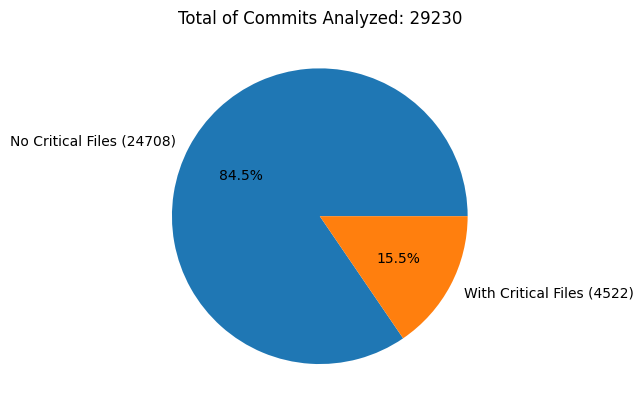

In [27]:
my_qtd_commits_to_analyze= commits_to_analyze[1]
my_commits_to_analyze = commits_to_analyze[0]
qtd_commits_with_critical_files = len(my_commits_to_analyze.keys())
qtd_commits_no_critical_files = my_qtd_commits_to_analyze - qtd_commits_with_critical_files

print(f'Total de commits analisados: {my_qtd_commits_to_analyze}')
print(f'Commits que possuem pelo menos um arquivo crítico: {qtd_commits_with_critical_files}')
print(f'Commits sem arquivos críticos: {qtd_commits_no_critical_files}')
print('\n')

plt.pie([qtd_commits_no_critical_files, qtd_commits_with_critical_files], labels=[f"No Critical Files ({qtd_commits_no_critical_files})", f"With Critical Files ({qtd_commits_with_critical_files})"], autopct="%1.1f%%")
plt.title(f"Total of Commits Analyzed: {my_qtd_commits_to_analyze}")
plt.show()

In [29]:
#2. Quantidade de commits com arquivos críticos
ve_lista_commits_com_arquivos_criticos, ve_qtd_commits_com_arquivos_criticos = commits_to_analyze[0].keys(), commits_to_analyze[1]

print(f'Quantidade de commits com arquivos críticos: {ve_qtd_commits_com_arquivos_criticos}')

Quantidade de commits com arquivos críticos: 29230


In [30]:
MESSAGE_COMMIT = 0
CRITICAL_FILES_COMMIT = 1
DATE_COMMIT = 2
LINES_COMMIT = 3
FILES_COMMIT = 4
DICT_DIFF_COMMIT = 5
MODIFIED_FILES_COMMIT = 6
DICT_MODIFIED_FILES_COMMIT = 7

l_commits_aux, l_msg_aux, l_critical_files_aux, l_date_aux, l_lines_aux, l_files_commit_aux, l_diff_commit_aux, l_modified_files_aux, l_dict_modified_files = [], [], [], [], [], [], [], [], []

dict_commits_to_analyse = commits_to_analyze[0]
for k, v in dict_commits_to_analyse.items():
  l_commits_aux.append(k)
  l_msg_aux.append(v[MESSAGE_COMMIT])
  l_critical_files_aux.append(v[CRITICAL_FILES_COMMIT])
  l_date_aux.append(v[DATE_COMMIT])
  l_lines_aux.append(v[LINES_COMMIT])
  l_files_commit_aux.append(v[FILES_COMMIT])
  l_diff_commit_aux.append(v[DICT_DIFF_COMMIT])
  l_modified_files_aux.append(v[MODIFIED_FILES_COMMIT])
  l_dict_modified_files.append(v[DICT_MODIFIED_FILES_COMMIT])

dict_commits_to_analyze_aux = {
	'commits':l_commits_aux,
	'msg': l_msg_aux,
	'critical_files': l_critical_files_aux,
  'data': l_date_aux,
	'lines': l_lines_aux,
  'files': l_files_commit_aux,
	'diff_commit': l_diff_commit_aux,
	'modified_files': l_modified_files_aux,
	'dict_modified_files': l_dict_modified_files
}

df_commits_to_analyze_aux = pd.DataFrame(dict_commits_to_analyze_aux)
df_commits_to_analyze_aux

,commits,msg,critical_files,data,lines,files,diff_commit,modified_files,dict_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,git-svn-id: https://svn.apache.org/repos/asf/i...,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...",2/3/2009,74502,344,"[{'DatabaseDescriptor.java': '@@ -0,0 +1,743 @...","[JSAP-2.1.jar, activation.jar, antlr-2.7.6.jar...",[Binary files /dev/null and b/lib/JSAP-2.1.jar...
1,cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,Add build script and make sure it works\n\ngit...,[StorageService.java],2/3/2009,156,4,"[{'StorageService.java': '@@ -70,11 +70,6 @@ i...","[build.xml, StorageService.java, DBTest.java, ...","[@@ -0,0 +1,133 @@\n+<?xml version=""1.0"" encod..."
2,5bea7e1772e9fd042b10abebb1e0c78579942b26,Removed references to JDK7 specific things.\n\...,[ColumnFamilyStore.java],20/3/2009,82,2,"[{'ColumnFamilyStore.java': '@@ -20,7 +20,6 @@...","[ColumnFamilyStore.java, Table.java]","[@@ -20,7 +20,6 @@ package org.apache.cassandr..."
3,f4f3ca50d84e165a909dca5608babb32df199f44,rename serializer2 -> serializerWithIndexers\n...,[ColumnFamilyStore.java],27/3/2009,26,4,"[{'ColumnFamilyStore.java': '@@ -22,10 +22,7 @...","[ColumnFamily.java, ColumnFamilyStore.java, Me...","[@@ -70,7 +70,7 @@ public final class ColumnFa..."
4,39d3f833f9c4e154eb157336f5e7b2a1ce9a79a3,add SuperColumn support to forceFlush. split ...,[ColumnFamilyStore.java],27/3/2009,89,5,"[{'ColumnFamilyStore.java': '@@ -395,11 +395,1...","[ColumnFamilyStore.java, HintedHandOffManager....","[@@ -395,11 +395,11 @@ public class ColumnFami..."
...,...,...,...,...,...,...,...,...,...
4517,6708499e4c930f7733894e6076b925fb151d9251,Remove metrics-reporter-config dependency\n\np...,[CassandraDaemon.java],12/9/2023,105,10,"[{'CassandraDaemon.java': '@@ -21,7 +21,6 @@ i...","[build-rat.xml, CHANGES.txt, NEWS.txt, jvm-ser...","[@@ -43,7 +43,6 @@\n <!-- Con..."
4518,20d80118ac02d853d501e3f5c24a63a12d4010f5,Add the ability to disable bulk loading of SST...,[Config.java],19/9/2023,289,11,"[{'Config.java': '@@ -860,6 +860,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.1\n+ * Add the ability to..."
4519,d16e8d3653dce8ed767a040c06dbaabc47a9b474,Do not create sstable files before registering...,[CompactionManager.java],25/9/2023,724,18,"[{'CompactionManager.java': '@@ -1624,7 +1624,...","[CHANGES.txt, CompactionManager.java, Upgrader...","[@@ -1,4 +1,5 @@\n 5.0-alpha2\n+ * Do not crea..."
4520,b9586501a6b6cdfe465302448018785652c9b966,Internode legacy SSL storage port certificate ...,[MessagingService.java],25/9/2023,237,13,"[{'MessagingService.java': '@@ -213,6 +213,7 @...","[CHANGES.txt, InboundConnectionInitiator.java,...","[@@ -1,4 +1,5 @@\n 4.1.4\n+ * Internode legacy..."


### Conjunto de Commits com Arquivos Críticos (by ATDCodeAnalyzer)

In [32]:
list_comits_with_critical_files = df_commits_to_analyze_aux.commits.to_list()
print('Commits com Arquivos Críticos (by ATDCodeAnalyzer)')
print(f'{len(list_comits_with_critical_files)}, {list_comits_with_critical_files}')
print('\n')
print('Convert list_comits_with_critical_files para um conjunto de commits')
set_comits_with_critical_files = set(list_comits_with_critical_files)

Commits com Arquivos Críticos (by ATDCodeAnalyzer)
4522, ['1f91e99223b0d1b7ed8390400d4a06ac08e4aa85', 'cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3', '5bea7e1772e9fd042b10abebb1e0c78579942b26', 'f4f3ca50d84e165a909dca5608babb32df199f44', '39d3f833f9c4e154eb157336f5e7b2a1ce9a79a3', 'b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d', 'ce8a73f2be0406f954f39aa6f6e20863e99e5461', '66dee7aaab26556561614ab056469ade85de5ebd', 'a996c8214baa4fa886071a24b8058ed1ca284686', '4cff66a0eebd138271f3fa5f23fae3df07a7adf7', '20e081f2901384f0786a56fb21a181033aa8e839', '8ce795a0a98cf18444af4c1c1528e6a12caf1320', 'dd61d5119d951d94da28256e5482d580a0685030', 'bf684eea956dbbbf7a35ef3deca8b4462b139136', '4c194aa8d14cc8b473939d3496cd576c4cb397e7', '76f33027535a192ab2d76ac1f01a5a8829c845af', '1866e3802bb16dd582cf5a95bc41bb13e808a0ba', '964dd9bb57230e1973aaede17c520ede1453a210', '52062900caf861e237355c297709976036c70404', '1cc4294d349e4d24c8a0894e3b4748d5f3798f00', 'bd884e4d986ebfa5568a431abc55813a6a903bb5', '2f8268cd099ce32a8

## 5.4 Commits contendo SATD Keywords e contendo Arquivos Críticos

Faz a intersecção entre commits com SATD keywords e commits com arquivos críticos

In [33]:
set_commits_with_satd_keywords_and_critical_files = set_comits_with_critical_files.intersection(set_list_commit_with_satd_keywords)
list_commits_with_satd_keywords_and_critical_files = list(set_commits_with_satd_keywords_and_critical_files)

df_commits_with_satd_keywords1 = df_commit_diffs_aux[df_commit_diffs_aux['commits'].isin(list_commits_with_satd_keywords_and_critical_files)]

df_commits_with_satd_keywords1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 513
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   commits   353 non-null    object
 1   keywords  353 non-null    object
 2   comments  353 non-null    object
dtypes: object(3)
memory usage: 11.0+ KB


In [34]:
df_commits_with_satd_keywords1

,commits,keywords,comments
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO: Once bind variables are supp...
1,b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d,"[TODO, TODO]",[ * (TODO: look at making SuperColumn immutabl...
3,66dee7aaab26556561614ab056469ade85de5ebd,"[TODO, TODO]",[\t\t\t// TODO: throw a thrift exception if we...
4,a996c8214baa4fa886071a24b8058ed1ca284686,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TODO]",[ // TODO clean up static structures too (e...
5,20e081f2901384f0786a56fb21a181033aa8e839,"[TODO, TODO]",[ // TODO this is broken because SST/Se...
...,...,...,...
508,f16fb6765b8a3ff8f49accf61c908791520c0d6e,[TODO],[ // TODO: Change this to modif...
510,ae537abc6494564d7254a2126465522d86b44c1e,"[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO - this doesn't feel right... ...
511,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,[TODO],"[ // TODO: Determine whether ""dropData""..."
512,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,"[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...


In [35]:
df_commits_with_satd_keywords2 = df_commits_to_analyze_aux[df_commits_to_analyze_aux['commits'].isin(list_commits_with_satd_keywords_and_critical_files)]
df_commits_with_satd_keywords2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 4504
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   commits              353 non-null    object
 1   msg                  353 non-null    object
 2   critical_files       353 non-null    object
 3   data                 353 non-null    object
 4   lines                353 non-null    int64 
 5   files                353 non-null    int64 
 6   diff_commit          353 non-null    object
 7   modified_files       353 non-null    object
 8   dict_modified_files  353 non-null    object
dtypes: int64(2), object(7)
memory usage: 27.6+ KB


In [36]:
df_commits_with_satd_keywords2

,commits,msg,critical_files,data,lines,files,diff_commit,modified_files,dict_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,git-svn-id: https://svn.apache.org/repos/asf/i...,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...",2/3/2009,74502,344,"[{'DatabaseDescriptor.java': '@@ -0,0 +1,743 @...","[JSAP-2.1.jar, activation.jar, antlr-2.7.6.jar...",[Binary files /dev/null and b/lib/JSAP-2.1.jar...
5,b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d,add deletion marker support to Column (boolean...,[ColumnFamilyStore.java],27/3/2009,997,11,"[{'ColumnFamilyStore.java': '@@ -614,17 +614,6...","[AbstractColumnFactory.java, Column.java, Colu...","[@@ -31,13 +31,13 @@ import java.util.StringTo..."
7,66dee7aaab26556561614ab056469ade85de5ebd,finish remove support. Split CFS.resolve() in...,"[ColumnFamilyStore.java, StorageProxy.java]",27/3/2009,536,8,"[{'ColumnFamilyStore.java': '@@ -18,15 +18,27 ...","[ColumnFamilyStore.java, HintedHandOffManager....","[@@ -18,15 +18,27 @@\n \r\n package org.apache..."
8,a996c8214baa4fa886071a24b8058ed1ca284686,test support. this requires some refactoring ...,"[DatabaseDescriptor.java, StorageService.java]",27/3/2009,1356,26,"[{'DatabaseDescriptor.java': '@@ -25,6 +25,8 @...","[build.xml, DatabaseDescriptor.java, BinaryMem...","[@@ -8,6 +8,8 @@\n <property name=""build.l..."
10,20e081f2901384f0786a56fb21a181033aa8e839,consolidates partition behavior in IPartitione...,"[ColumnFamilyStore.java, StorageService.java]",27/3/2009,1263,18,"[{'ColumnFamilyStore.java': '@@ -1269,39 +1269...","[ColumnFamilyStore.java, FileStruct.java, Memt...","[@@ -1269,39 +1269,10 @@ public class ColumnFa..."
...,...,...,...,...,...,...,...,...,...
4488,f16fb6765b8a3ff8f49accf61c908791520c0d6e,Implementation of the trie-indexed SSTable for...,"[Config.java, DatabaseDescriptor.java, SSTable...",29/5/2023,15312,161,"[{'Config.java': '@@ -315,7 +315,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.0\n+ * CEP-25: Trie-index..."
4493,ae537abc6494564d7254a2126465522d86b44c1e,"Added support for type VECTOR<type, dimension>...","[DatabaseDescriptor.java, SelectStatement.java...",22/6/2023,8843,108,"[{'DatabaseDescriptor.java': '@@ -217,7 +217,7...","[CHANGES.txt, NEWS.txt, CQL.textile, term.bnf,...","[@@ -1,4 +1,5 @@\n 5.0\n+ * Added support for ..."
4502,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,Add Index Group Interface for Storage Attached...,"[ColumnFamilyStore.java, SinglePartitionReadCo...",26/7/2023,2633,65,"[{'ColumnFamilyStore.java': '@@ -660,7 +660,7 ...","[CassandraTableWriteHandler.java, ColumnFamily...","[@@ -19,7 +19,6 @@\n package org.apache.cassan..."
4503,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,In-memory index implementation with query path...,"[SinglePartitionReadCommand.java, StorageServi...",26/7/2023,20645,244,"[{'SinglePartitionReadCommand.java': '@@ -237,...","[cassandra-build-deps-template.xml, cassandra-...","[@@ -135,5 +135,9 @@\n <groupId>de.jflex..."


In [37]:
df_commits_with_satd_keywords_with_critical_files = df_commits_with_satd_keywords1.merge(df_commits_with_satd_keywords2, on='commits', how='outer')

colunas_ok = ['commits', 'data', 'msg', 'lines', 'files', 'critical_files', 'keywords', 'comments',
       'diff_commit', 'modified_files','dict_modified_files']

df_commits_with_satd_keywords_with_critical_files = df_commits_with_satd_keywords_with_critical_files[colunas_ok]
df_commits_with_satd_keywords_with_critical_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 352
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   commits              353 non-null    object
 1   data                 353 non-null    object
 2   msg                  353 non-null    object
 3   lines                353 non-null    int64 
 4   files                353 non-null    int64 
 5   critical_files       353 non-null    object
 6   keywords             353 non-null    object
 7   comments             353 non-null    object
 8   diff_commit          353 non-null    object
 9   modified_files       353 non-null    object
 10  dict_modified_files  353 non-null    object
dtypes: int64(2), object(9)
memory usage: 33.1+ KB


In [38]:
df_commits_with_satd_keywords_with_critical_files

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,1f91e99223b0d1b7ed8390400d4a06ac08e4aa85,2/3/2009,git-svn-id: https://svn.apache.org/repos/asf/i...,74502,344,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO: Once bind variables are supp...,"[{'DatabaseDescriptor.java': '@@ -0,0 +1,743 @...","[JSAP-2.1.jar, activation.jar, antlr-2.7.6.jar...",[Binary files /dev/null and b/lib/JSAP-2.1.jar...
1,b6ae87ba0054ed3bb7ebcf69dfa7d47e92da399d,27/3/2009,add deletion marker support to Column (boolean...,997,11,[ColumnFamilyStore.java],"[TODO, TODO]",[ * (TODO: look at making SuperColumn immutabl...,"[{'ColumnFamilyStore.java': '@@ -614,17 +614,6...","[AbstractColumnFactory.java, Column.java, Colu...","[@@ -31,13 +31,13 @@ import java.util.StringTo..."
2,66dee7aaab26556561614ab056469ade85de5ebd,27/3/2009,finish remove support. Split CFS.resolve() in...,536,8,"[ColumnFamilyStore.java, StorageProxy.java]","[TODO, TODO]",[\t\t\t// TODO: throw a thrift exception if we...,"[{'ColumnFamilyStore.java': '@@ -18,15 +18,27 ...","[ColumnFamilyStore.java, HintedHandOffManager....","[@@ -18,15 +18,27 @@\n \r\n package org.apache..."
3,a996c8214baa4fa886071a24b8058ed1ca284686,27/3/2009,test support. this requires some refactoring ...,1356,26,"[DatabaseDescriptor.java, StorageService.java]","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TODO]",[ // TODO clean up static structures too (e...,"[{'DatabaseDescriptor.java': '@@ -25,6 +25,8 @...","[build.xml, DatabaseDescriptor.java, BinaryMem...","[@@ -8,6 +8,8 @@\n <property name=""build.l..."
4,20e081f2901384f0786a56fb21a181033aa8e839,27/3/2009,consolidates partition behavior in IPartitione...,1263,18,"[ColumnFamilyStore.java, StorageService.java]","[TODO, TODO]",[ // TODO this is broken because SST/Se...,"[{'ColumnFamilyStore.java': '@@ -1269,39 +1269...","[ColumnFamilyStore.java, FileStruct.java, Memt...","[@@ -1269,39 +1269,10 @@ public class ColumnFa..."
...,...,...,...,...,...,...,...,...,...,...,...
348,f16fb6765b8a3ff8f49accf61c908791520c0d6e,29/5/2023,Implementation of the trie-indexed SSTable for...,15312,161,"[Config.java, DatabaseDescriptor.java, SSTable...",[TODO],[ // TODO: Change this to modif...,"[{'Config.java': '@@ -315,7 +315,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.0\n+ * CEP-25: Trie-index..."
349,ae537abc6494564d7254a2126465522d86b44c1e,22/6/2023,"Added support for type VECTOR<type, dimension>...",8843,108,"[DatabaseDescriptor.java, SelectStatement.java...","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO - this doesn't feel right... ...,"[{'DatabaseDescriptor.java': '@@ -217,7 +217,7...","[CHANGES.txt, NEWS.txt, CQL.textile, term.bnf,...","[@@ -1,4 +1,5 @@\n 5.0\n+ * Added support for ..."
350,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,26/7/2023,Add Index Group Interface for Storage Attached...,2633,65,"[ColumnFamilyStore.java, SinglePartitionReadCo...",[TODO],"[ // TODO: Determine whether ""dropData""...","[{'ColumnFamilyStore.java': '@@ -660,7 +660,7 ...","[CassandraTableWriteHandler.java, ColumnFamily...","[@@ -19,7 +19,6 @@\n package org.apache.cassan..."
351,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,26/7/2023,In-memory index implementation with query path...,20645,244,"[SinglePartitionReadCommand.java, StorageServi...","[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...,"[{'SinglePartitionReadCommand.java': '@@ -237,...","[cassandra-build-deps-template.xml, cassandra-...","[@@ -135,5 +135,9 @@\n <groupId>de.jflex..."


In [39]:
round(df_commits_with_satd_keywords_with_critical_files.describe(), 2)

,lines,files
count,353.00,353.00
mean,3176.48,45.28
std,9899.82,82.31
min,7.00,1.00
25%,254.00,8.00
50%,807.00,18.00
75%,2333.00,42.00
max,102232.00,645.00


Total de commits analisados: 29230
Commits que possuem pelo menos um arquivo crítico: 4522
Qtd de commits sem SATD e sem arquivos críticos: 28877
Qtd de commits com SATD e arquivos críticos: 353




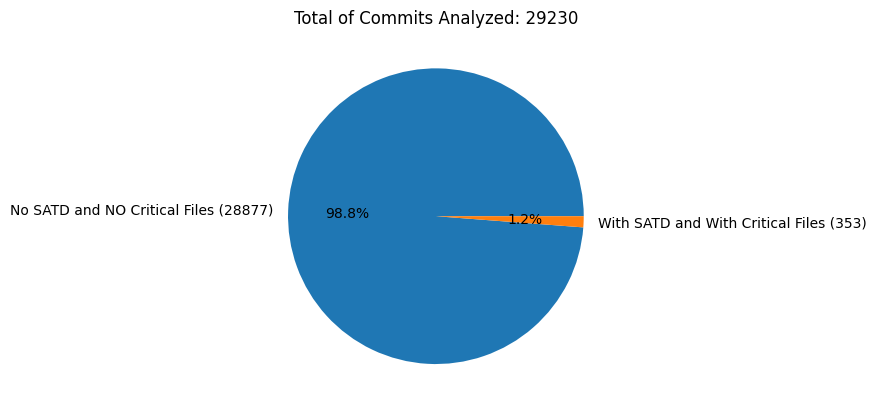

In [40]:
qtd_commits_with_satd_and_critical_files = len(df_commits_with_satd_keywords_with_critical_files.commits.to_list())
qtd_commits_no_satd_no_critical_files = my_qtd_commits_to_analyze - qtd_commits_with_satd_and_critical_files

# Dos x commits com arquivos criticos quantos tem SATD?
print(f'Total de commits analisados: {my_qtd_commits_to_analyze}')
print(f'Commits que possuem pelo menos um arquivo crítico: {qtd_commits_with_critical_files}')
print(f'Qtd de commits sem SATD e sem arquivos críticos: {qtd_commits_no_satd_no_critical_files}')
print(f'Qtd de commits com SATD e arquivos críticos: {qtd_commits_with_satd_and_critical_files}')
print(f'\n')

plt.pie([qtd_commits_no_satd_no_critical_files, qtd_commits_with_satd_and_critical_files], labels=[f"No SATD and NO Critical Files ({qtd_commits_no_satd_no_critical_files})", f"With SATD and With Critical Files ({qtd_commits_with_satd_and_critical_files})"], autopct="%1.1f%%")
plt.title(f"Total of Commits Analyzed: {my_qtd_commits_to_analyze}")
plt.show()

In [41]:
print('Salva o dataframe de df_commits_with_satd_keywords_with_critical_files em uma planilha excel')
df_commits_with_satd_keywords_with_critical_files.to_excel('commits_with_satd_keywords_with_critical_files.xlsx')

Salva o dataframe de df_commits_with_satd_keywords_with_critical_files em uma planilha excel


# 6. Analyzes Jira issues

## 6.1 Configures the instance, project and date range

In [42]:
# Initialize the Jira connection
print('Initialize the Jira connection')
jira = JIRA(JIRA_SERVER, basic_auth=(username, password))

# Create a JiraUtils instance
print('Create a JiraUtils instance')
jira_utils = JiraUtils('CASSANDRA', jira)

date1 = (2009, 3, 2)
date2 = (2023, 10, 4)
distance = 120
print('Define date intervals')
print(f'From: {str(date1)} to: {date2}, by: {distance} days of distance.')

Initialize the Jira connection
Create a JiraUtils instance
Define date intervals
From: (2009, 3, 2) to: (2023, 10, 4), by: 120 days of distance.


## 6.2 Retrieves all blocks of issues in range of dates

In [43]:
# Fetch issues using date intervals
print('Fetch issues using date intervals')
block_of_issues = jira_utils.get_list_of_block_issues_by_dates(date1, date2, distance)

Fetch issues using date intervals
Aguarde...


Progress Message Analysis:   2%|▏         | 1/45 [00:03<02:47,  3.81s/it]

Range: project=CASSANDRA and created>="2009/03/02" and created<="2009/06/29", qtd issues: 263


Progress Message Analysis:   4%|▍         | 2/45 [00:07<02:36,  3.63s/it]

Range: project=CASSANDRA and created>="2009/06/30" and created<="2009/10/27", qtd issues: 251


Progress Message Analysis:   7%|▋         | 3/45 [00:11<02:35,  3.70s/it]

Range: project=CASSANDRA and created>="2009/10/28" and created<="2010/02/24", qtd issues: 310


Progress Message Analysis:   9%|▉         | 4/45 [00:16<02:55,  4.27s/it]

Range: project=CASSANDRA and created>="2010/02/25" and created<="2010/06/24", qtd issues: 388


Progress Message Analysis:  11%|█         | 5/45 [00:21<03:03,  4.60s/it]

Range: project=CASSANDRA and created>="2010/06/25" and created<="2010/10/22", qtd issues: 419


Progress Message Analysis:  13%|█▎        | 6/45 [00:28<03:30,  5.40s/it]

Range: project=CASSANDRA and created>="2010/10/23" and created<="2011/02/19", qtd issues: 545


Progress Message Analysis:  16%|█▌        | 7/45 [00:35<03:44,  5.91s/it]

Range: project=CASSANDRA and created>="2011/02/20" and created<="2011/06/19", qtd issues: 593


Progress Message Analysis:  18%|█▊        | 8/45 [00:43<04:01,  6.53s/it]

Range: project=CASSANDRA and created>="2011/06/20" and created<="2011/10/17", qtd issues: 573


Progress Message Analysis:  20%|██        | 9/45 [00:49<03:53,  6.50s/it]

Range: project=CASSANDRA and created>="2011/10/18" and created<="2012/02/14", qtd issues: 532


Progress Message Analysis:  22%|██▏       | 10/45 [00:54<03:29,  5.99s/it]

Range: project=CASSANDRA and created>="2012/02/15" and created<="2012/06/13", qtd issues: 423


Progress Message Analysis:  24%|██▍       | 11/45 [01:00<03:23,  6.00s/it]

Range: project=CASSANDRA and created>="2012/06/14" and created<="2012/10/11", qtd issues: 441


Progress Message Analysis:  27%|██▋       | 12/45 [01:05<03:09,  5.75s/it]

Range: project=CASSANDRA and created>="2012/10/12" and created<="2013/02/08", qtd issues: 433


Progress Message Analysis:  29%|██▉       | 13/45 [01:10<02:56,  5.50s/it]

Range: project=CASSANDRA and created>="2013/02/09" and created<="2013/06/08", qtd issues: 386


Progress Message Analysis:  31%|███       | 14/45 [01:16<02:56,  5.69s/it]

Range: project=CASSANDRA and created>="2013/06/09" and created<="2013/10/06", qtd issues: 522


Progress Message Analysis:  33%|███▎      | 15/45 [01:24<03:11,  6.39s/it]

Range: project=CASSANDRA and created>="2013/10/07" and created<="2014/02/03", qtd issues: 492


Progress Message Analysis:  36%|███▌      | 16/45 [01:33<03:24,  7.07s/it]

Range: project=CASSANDRA and created>="2014/02/04" and created<="2014/06/03", qtd issues: 690


Progress Message Analysis:  38%|███▊      | 17/45 [01:42<03:33,  7.63s/it]

Range: project=CASSANDRA and created>="2014/06/04" and created<="2014/10/01", qtd issues: 680


Progress Message Analysis:  40%|████      | 18/45 [01:52<03:43,  8.29s/it]

Range: project=CASSANDRA and created>="2014/10/02" and created<="2015/01/29", qtd issues: 655


Progress Message Analysis:  42%|████▏     | 19/45 [02:02<03:49,  8.83s/it]

Range: project=CASSANDRA and created>="2015/01/30" and created<="2015/05/29", qtd issues: 802


Progress Message Analysis:  44%|████▍     | 20/45 [02:12<03:54,  9.38s/it]

Range: project=CASSANDRA and created>="2015/05/30" and created<="2015/09/26", qtd issues: 875


Progress Message Analysis:  47%|████▋     | 21/45 [02:22<03:46,  9.45s/it]

Range: project=CASSANDRA and created>="2015/09/27" and created<="2016/01/24", qtd issues: 659


Progress Message Analysis:  49%|████▉     | 22/45 [02:31<03:32,  9.23s/it]

Range: project=CASSANDRA and created>="2016/01/25" and created<="2016/05/23", qtd issues: 769


Progress Message Analysis:  51%|█████     | 23/45 [02:40<03:23,  9.26s/it]

Range: project=CASSANDRA and created>="2016/05/24" and created<="2016/09/20", qtd issues: 787


Progress Message Analysis:  53%|█████▎    | 24/45 [02:45<02:48,  8.01s/it]

Range: project=CASSANDRA and created>="2016/09/21" and created<="2017/01/18", qtd issues: 453


Progress Message Analysis:  56%|█████▌    | 25/45 [02:50<02:21,  7.07s/it]

Range: project=CASSANDRA and created>="2017/01/19" and created<="2017/05/18", qtd issues: 403


Progress Message Analysis:  58%|█████▊    | 26/45 [02:54<01:58,  6.26s/it]

Range: project=CASSANDRA and created>="2017/05/19" and created<="2017/09/15", qtd issues: 338


Progress Message Analysis:  60%|██████    | 27/45 [02:58<01:37,  5.43s/it]

Range: project=CASSANDRA and created>="2017/09/16" and created<="2018/01/13", qtd issues: 282


Progress Message Analysis:  62%|██████▏   | 28/45 [03:01<01:21,  4.78s/it]

Range: project=CASSANDRA and created>="2018/01/14" and created<="2018/05/13", qtd issues: 277


Progress Message Analysis:  64%|██████▍   | 29/45 [03:07<01:20,  5.02s/it]

Range: project=CASSANDRA and created>="2018/05/14" and created<="2018/09/10", qtd issues: 265


Progress Message Analysis:  67%|██████▋   | 30/45 [03:10<01:06,  4.43s/it]

Range: project=CASSANDRA and created>="2018/09/11" and created<="2019/01/08", qtd issues: 250


Progress Message Analysis:  69%|██████▉   | 31/45 [03:12<00:51,  3.68s/it]

Range: project=CASSANDRA and created>="2019/01/09" and created<="2019/05/08", qtd issues: 143


Progress Message Analysis:  71%|███████   | 32/45 [03:14<00:42,  3.28s/it]

Range: project=CASSANDRA and created>="2019/05/09" and created<="2019/09/05", qtd issues: 177


Progress Message Analysis:  73%|███████▎  | 33/45 [03:16<00:35,  2.99s/it]

Range: project=CASSANDRA and created>="2019/09/06" and created<="2020/01/03", qtd issues: 164


Progress Message Analysis:  76%|███████▌  | 34/45 [03:21<00:37,  3.39s/it]

Range: project=CASSANDRA and created>="2020/01/04" and created<="2020/05/02", qtd issues: 306


Progress Message Analysis:  78%|███████▊  | 35/45 [03:24<00:34,  3.50s/it]

Range: project=CASSANDRA and created>="2020/05/03" and created<="2020/08/30", qtd issues: 300


Progress Message Analysis:  80%|████████  | 36/45 [03:28<00:32,  3.60s/it]

Range: project=CASSANDRA and created>="2020/08/31" and created<="2020/12/28", qtd issues: 284


Progress Message Analysis:  82%|████████▏ | 37/45 [03:32<00:28,  3.56s/it]

Range: project=CASSANDRA and created>="2020/12/29" and created<="2021/04/27", qtd issues: 262


Progress Message Analysis:  84%|████████▍ | 38/45 [03:35<00:24,  3.52s/it]

Range: project=CASSANDRA and created>="2021/04/28" and created<="2021/08/25", qtd issues: 244


Progress Message Analysis:  87%|████████▋ | 39/45 [03:39<00:22,  3.73s/it]

Range: project=CASSANDRA and created>="2021/08/26" and created<="2021/12/23", qtd issues: 342


Progress Message Analysis:  89%|████████▉ | 40/45 [03:43<00:19,  3.81s/it]

Range: project=CASSANDRA and created>="2021/12/24" and created<="2022/04/22", qtd issues: 340


Progress Message Analysis:  91%|█████████ | 41/45 [03:47<00:15,  3.83s/it]

Range: project=CASSANDRA and created>="2022/04/23" and created<="2022/08/20", qtd issues: 267


Progress Message Analysis:  93%|█████████▎| 42/45 [03:51<00:11,  3.73s/it]

Range: project=CASSANDRA and created>="2022/08/21" and created<="2022/12/18", qtd issues: 273


Progress Message Analysis:  96%|█████████▌| 43/45 [03:57<00:09,  4.57s/it]

Range: project=CASSANDRA and created>="2022/12/19" and created<="2023/04/17", qtd issues: 328


Progress Message Analysis:  98%|█████████▊| 44/45 [04:01<00:04,  4.37s/it]

Range: project=CASSANDRA and created>="2023/04/18" and created<="2023/08/15", qtd issues: 298


Progress Message Analysis: 100%|██████████| 45/45 [04:04<00:00,  5.44s/it]

Range: project=CASSANDRA and created>="2023/08/16" and created<="2023/12/13", qtd issues: 257
2023-11-13 17:44:49.722146
Tempo da consulta: 0:04:04.826492


In [44]:
# Concatenate the block of issues into a single list
print('Concatenate the block of issues into a single list')
all_issues = jira_utils.concatenate_block_of_issues(block_of_issues)

Concatenate the block of issues into a single list
Total de issues recuperados: 18741


In [45]:
#3. Quantidade total de issues analisados
ve_qtd_total_issues = len(all_issues)
ve_lista_com_todos_os_issues = []
for issue in all_issues:
  ve_lista_com_todos_os_issues.append(issue.key)

In [46]:
project = 'CASSANDRA'

# Fetch 'all_issues' from your Jira server

# Call the function to analyze Jira issues for SATD
my_jira_issues = analyze_jira_all_issues(project, all_issues)

Progress jira all issues analysis: 100%|██████████| 18741/18741 [00:00<00:00, 72253.63it/s]


## 6.3 Filtra issues que também aparecem nos commits com arquivos críticos

In [47]:
def find_issues_id_by_project(input_string: str, project: str) -> list[str]:
    """Finds all Cassandra issue ID patterns in the input string.
    Args:
        input_string: The input string.
        project: The pattern related to project name, for example: CASSANDRA project name
    Returns:
        A list of project issue IDs, if found; otherwise, an empty list.
    """
    # Try to find all Cassandra issue ID patterns in the input string
    matches = re.findall(r"({0}-\d+)".format(project), input_string)
    # Return an empty list if no matches are found
    if not matches:
        return []
    # Convert the list of matches to a set to remove duplicates
    set_matches = set(matches)
    # Convert the set of matches back to a list
    list_unique_matches = list(set_matches)

    # Return the list of matched Cassandra issue IDs
    return list_unique_matches

In [48]:
dict_issues_in_commits = {}
for index in df_commits_with_satd_keywords_with_critical_files.index:
  l_issues_in_commit = find_issues_id_by_project(input_string=df_commits_with_satd_keywords_with_critical_files.msg[index], project='CASSANDRA')
  if len(l_issues_in_commit) > 0:
    commit_hash = df_commits_with_satd_keywords_with_critical_files.commits[index]
    dict_issues_in_commits[commit_hash] = l_issues_in_commit

print(f'Existem {len(dict_issues_in_commits)} issues que foram registrados nos commits. ')

Existem 298 issues que foram registrados nos commits. 


### Relação de issues e aparecem nos commits com arquivos críticos

In [49]:
dict_issues_in_commits_aux = {}
l_issues_in_commits, l_issues_issues_in_commits= [], []

print('Commits que possuem issues registrados em suas mensagens: ')
for k, v in dict_issues_in_commits.items():
  l_issues_in_commits.append(k)
  l_issues_issues_in_commits.append(v)

dict_issues_in_commits_aux = {
    'commits':l_issues_in_commits,
    'issues_ids':l_issues_issues_in_commits
}

df_issues_in_commits_aux = pd.DataFrame(dict_issues_in_commits_aux)
df_issues_in_commits_aux

Commits que possuem issues registrados em suas mensagens: 


,commits,issues_ids
0,907d92e21b8ce79e6a224933764e3b7215a94454,[CASSANDRA-65]
1,9db8da81b7f269e5a8a7f896b751d482847d7082,[CASSANDRA-71]
2,219293b2b35453320c78514f9de7724da164638e,[CASSANDRA-130]
3,b460bd71c5484d3579dfccaa77a2d2cb0381aea2,[CASSANDRA-161]
4,4ac9118f7c7b9162b7ab3ca29ef64c1bbde346a0,[CASSANDRA-172]
...,...,...
293,f16fb6765b8a3ff8f49accf61c908791520c0d6e,[CASSANDRA-18398]
294,ae537abc6494564d7254a2126465522d86b44c1e,[CASSANDRA-18504]
295,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,[CASSANDRA-16092]
296,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,[CASSANDRA-18058]


In [50]:
lista_issues_in_commits_with_critical_files = df_issues_in_commits_aux.commits.to_list()
print(lista_issues_in_commits_with_critical_files)

['907d92e21b8ce79e6a224933764e3b7215a94454', '9db8da81b7f269e5a8a7f896b751d482847d7082', '219293b2b35453320c78514f9de7724da164638e', 'b460bd71c5484d3579dfccaa77a2d2cb0381aea2', '4ac9118f7c7b9162b7ab3ca29ef64c1bbde346a0', '72e6eea9e4ce1fcf30754534216586bcf9e7b041', '9aeef94db8309764fa241b92c8ee92380e39cafa', 'f9a1343d92237e6a9553a4fd96db0208b6789126', 'd6c0b0f2596de169186d3584474d8d5a34c3c9de', '48093358fb9022947592813a6aae43db148847ca', 'f2da00fb0f2c92351b136ac13082b278c534c6ab', '986cee6806c5798c1c826d965ecadad0cfc70cc7', 'e425474af2e08dd4a54db2316cb6758f972fa778', 'b866f81415e160bc7669250e531035b4dc976988', '066ef58a96dd9d425f7f0a705ac952a0c3f9f863', '0f95411c030f89dd4274cc4e9fdd14b1fda32b2e', 'd1f4234d26ba7289233df9245a54774be551186b', '6c492310278bb83853542992ce9b7d523a180a9a', 'fba03ce69122e7a1bd6f2d5709eaa06c1ada0bc1', '7ea2c96852f1b3f4fceda17a70cb2ccbc95060e7', '0c5cd149a38e927021f53ba0c109f1da15cb3546', '6690c5135943b2d15155a92fa9bc4d7f46fc8cdc', '7bfe8df549c5bd2761801e3616f7c0

In [51]:
df_commits_with_satd_keywords_with_critical_files_with_issues = df_commits_with_satd_keywords_with_critical_files[df_commits_with_satd_keywords_with_critical_files.commits.isin(lista_issues_in_commits_with_critical_files)]
df_commits_with_satd_keywords_with_critical_files_with_issues

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
16,907d92e21b8ce79e6a224933764e3b7215a94454,27/4/2009,replace BigInteger tokens with BigIntegerToken...,1090,31,"[ColumnFamilyStore.java, StorageService.java]",[TODO],[ // TODO make locale configurable. But do...,"[{'ColumnFamilyStore.java': '@@ -43,6 +43,7 @@...","[ColumnFamilyStore.java, DBManager.java, FileS...","[@@ -43,6 +43,7 @@ import org.apache.log4j.Log..."
17,9db8da81b7f269e5a8a7f896b751d482847d7082,29/4/2009,"Add range query support, which requires using ...",1456,19,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...","[TODO, TODO]",[ // TODO record the key source...,"[{'DatabaseDescriptor.java': '@@ -87,7 +87,7 @...","[cassandra.thrift, Cassandra.java, DatabaseDes...","[@@ -114,6 +114,9 @@ service Cassandra {\n \n ..."
18,219293b2b35453320c78514f9de7724da164638e,4/5/2009,clean up logging. move some of it into MBeans...,493,9,"[ColumnFamilyStore.java, MessagingService.java...",[TODO],[ // TODO send more requests if we ...,"[{'ColumnFamilyStore.java': '@@ -1423,6 +1423,...","[ColumnFamilyStore.java, ColumnFamilyStoreMBea...","[@@ -1423,6 +1423,11 @@ public class ColumnFam..."
21,b460bd71c5484d3579dfccaa77a2d2cb0381aea2,12/5/2009,test to more reliably reproduce CME during ran...,53,3,[ColumnFamilyStore.java],[TODO],[ // TODO we need a better way to keep ...,"[{'ColumnFamilyStore.java': '@@ -1526,11 +1526...","[ColumnFamilyStore.java, Table.java, OneCompac...","[@@ -1526,11 +1526,17 @@ public class ColumnFa..."
23,4ac9118f7c7b9162b7ab3ca29ef64c1bbde346a0,22/5/2009,Add get_slice_from functionality using column ...,2252,17,[ColumnFamilyStore.java],"[TODO, TODO]",[ // TODO if we are dealing with superc...,"[{'ColumnFamilyStore.java': '@@ -45,6 +45,10 @...","[cassandra.thrift, Cassandra.java, google-coll...","[@@ -83,9 +83,12 @@ service Cassandra {\n li..."
...,...,...,...,...,...,...,...,...,...,...,...
348,f16fb6765b8a3ff8f49accf61c908791520c0d6e,29/5/2023,Implementation of the trie-indexed SSTable for...,15312,161,"[Config.java, DatabaseDescriptor.java, SSTable...",[TODO],[ // TODO: Change this to modif...,"[{'Config.java': '@@ -315,7 +315,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.0\n+ * CEP-25: Trie-index..."
349,ae537abc6494564d7254a2126465522d86b44c1e,22/6/2023,"Added support for type VECTOR<type, dimension>...",8843,108,"[DatabaseDescriptor.java, SelectStatement.java...","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO - this doesn't feel right... ...,"[{'DatabaseDescriptor.java': '@@ -217,7 +217,7...","[CHANGES.txt, NEWS.txt, CQL.textile, term.bnf,...","[@@ -1,4 +1,5 @@\n 5.0\n+ * Added support for ..."
350,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,26/7/2023,Add Index Group Interface for Storage Attached...,2633,65,"[ColumnFamilyStore.java, SinglePartitionReadCo...",[TODO],"[ // TODO: Determine whether ""dropData""...","[{'ColumnFamilyStore.java': '@@ -660,7 +660,7 ...","[CassandraTableWriteHandler.java, ColumnFamily...","[@@ -19,7 +19,6 @@\n package org.apache.cassan..."
351,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,26/7/2023,In-memory index implementation with query path...,20645,244,"[SinglePartitionReadCommand.java, StorageServi...","[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...,"[{'SinglePartitionReadCommand.java': '@@ -237,...","[cassandra-build-deps-template.xml, cassandra-...","[@@ -135,5 +135,9 @@\n <groupId>de.jflex..."


In [52]:
df_issues_in_commits_with_critical_classes_kl_satd = pd.merge(df_commits_with_satd_keywords_with_critical_files_with_issues, df_issues_in_commits_aux, how='inner')
df_issues_in_commits_with_critical_classes_kl_satd

,commits,data,msg,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files,issues_ids
0,907d92e21b8ce79e6a224933764e3b7215a94454,27/4/2009,replace BigInteger tokens with BigIntegerToken...,1090,31,"[ColumnFamilyStore.java, StorageService.java]",[TODO],[ // TODO make locale configurable. But do...,"[{'ColumnFamilyStore.java': '@@ -43,6 +43,7 @@...","[ColumnFamilyStore.java, DBManager.java, FileS...","[@@ -43,6 +43,7 @@ import org.apache.log4j.Log...",[CASSANDRA-65]
1,9db8da81b7f269e5a8a7f896b751d482847d7082,29/4/2009,"Add range query support, which requires using ...",1456,19,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...","[TODO, TODO]",[ // TODO record the key source...,"[{'DatabaseDescriptor.java': '@@ -87,7 +87,7 @...","[cassandra.thrift, Cassandra.java, DatabaseDes...","[@@ -114,6 +114,9 @@ service Cassandra {\n \n ...",[CASSANDRA-71]
2,219293b2b35453320c78514f9de7724da164638e,4/5/2009,clean up logging. move some of it into MBeans...,493,9,"[ColumnFamilyStore.java, MessagingService.java...",[TODO],[ // TODO send more requests if we ...,"[{'ColumnFamilyStore.java': '@@ -1423,6 +1423,...","[ColumnFamilyStore.java, ColumnFamilyStoreMBea...","[@@ -1423,6 +1423,11 @@ public class ColumnFam...",[CASSANDRA-130]
3,b460bd71c5484d3579dfccaa77a2d2cb0381aea2,12/5/2009,test to more reliably reproduce CME during ran...,53,3,[ColumnFamilyStore.java],[TODO],[ // TODO we need a better way to keep ...,"[{'ColumnFamilyStore.java': '@@ -1526,11 +1526...","[ColumnFamilyStore.java, Table.java, OneCompac...","[@@ -1526,11 +1526,17 @@ public class ColumnFa...",[CASSANDRA-161]
4,4ac9118f7c7b9162b7ab3ca29ef64c1bbde346a0,22/5/2009,Add get_slice_from functionality using column ...,2252,17,[ColumnFamilyStore.java],"[TODO, TODO]",[ // TODO if we are dealing with superc...,"[{'ColumnFamilyStore.java': '@@ -45,6 +45,10 @...","[cassandra.thrift, Cassandra.java, google-coll...","[@@ -83,9 +83,12 @@ service Cassandra {\n li...",[CASSANDRA-172]
...,...,...,...,...,...,...,...,...,...,...,...,...
293,f16fb6765b8a3ff8f49accf61c908791520c0d6e,29/5/2023,Implementation of the trie-indexed SSTable for...,15312,161,"[Config.java, DatabaseDescriptor.java, SSTable...",[TODO],[ // TODO: Change this to modif...,"[{'Config.java': '@@ -315,7 +315,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.0\n+ * CEP-25: Trie-index...",[CASSANDRA-18398]
294,ae537abc6494564d7254a2126465522d86b44c1e,22/6/2023,"Added support for type VECTOR<type, dimension>...",8843,108,"[DatabaseDescriptor.java, SelectStatement.java...","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO - this doesn't feel right... ...,"[{'DatabaseDescriptor.java': '@@ -217,7 +217,7...","[CHANGES.txt, NEWS.txt, CQL.textile, term.bnf,...","[@@ -1,4 +1,5 @@\n 5.0\n+ * Added support for ...",[CASSANDRA-18504]
295,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,26/7/2023,Add Index Group Interface for Storage Attached...,2633,65,"[ColumnFamilyStore.java, SinglePartitionReadCo...",[TODO],"[ // TODO: Determine whether ""dropData""...","[{'ColumnFamilyStore.java': '@@ -660,7 +660,7 ...","[CassandraTableWriteHandler.java, ColumnFamily...","[@@ -19,7 +19,6 @@\n package org.apache.cassan...",[CASSANDRA-16092]
296,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,26/7/2023,In-memory index implementation with query path...,20645,244,"[SinglePartitionReadCommand.java, StorageServi...","[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...,"[{'SinglePartitionReadCommand.java': '@@ -237,...","[cassandra-build-deps-template.xml, cassandra-...","[@@ -135,5 +135,9 @@\n <groupId>de.jflex...",[CASSANDRA-18058]


In [68]:
my_columns = ['commits', 'issues_ids', 'msg','data', 'lines', 'files', 'critical_files',
       'keywords', 'comments', 'diff_commit', 'modified_files',
       'dict_modified_files']
df_issues_in_commits_with_critical_classes_kl_satd[my_columns]

,commits,issues_ids,msg,data,lines,files,critical_files,keywords,comments,diff_commit,modified_files,dict_modified_files
0,907d92e21b8ce79e6a224933764e3b7215a94454,[CASSANDRA-65],replace BigInteger tokens with BigIntegerToken...,27/4/2009,1090,31,"[ColumnFamilyStore.java, StorageService.java]",[TODO],[ // TODO make locale configurable. But do...,"[{'ColumnFamilyStore.java': '@@ -43,6 +43,7 @@...","[ColumnFamilyStore.java, DBManager.java, FileS...","[@@ -43,6 +43,7 @@ import org.apache.log4j.Log..."
1,9db8da81b7f269e5a8a7f896b751d482847d7082,[CASSANDRA-71],"Add range query support, which requires using ...",29/4/2009,1456,19,"[DatabaseDescriptor.java, ColumnFamilyStore.ja...","[TODO, TODO]",[ // TODO record the key source...,"[{'DatabaseDescriptor.java': '@@ -87,7 +87,7 @...","[cassandra.thrift, Cassandra.java, DatabaseDes...","[@@ -114,6 +114,9 @@ service Cassandra {\n \n ..."
2,219293b2b35453320c78514f9de7724da164638e,[CASSANDRA-130],clean up logging. move some of it into MBeans...,4/5/2009,493,9,"[ColumnFamilyStore.java, MessagingService.java...",[TODO],[ // TODO send more requests if we ...,"[{'ColumnFamilyStore.java': '@@ -1423,6 +1423,...","[ColumnFamilyStore.java, ColumnFamilyStoreMBea...","[@@ -1423,6 +1423,11 @@ public class ColumnFam..."
3,b460bd71c5484d3579dfccaa77a2d2cb0381aea2,[CASSANDRA-161],test to more reliably reproduce CME during ran...,12/5/2009,53,3,[ColumnFamilyStore.java],[TODO],[ // TODO we need a better way to keep ...,"[{'ColumnFamilyStore.java': '@@ -1526,11 +1526...","[ColumnFamilyStore.java, Table.java, OneCompac...","[@@ -1526,11 +1526,17 @@ public class ColumnFa..."
4,4ac9118f7c7b9162b7ab3ca29ef64c1bbde346a0,[CASSANDRA-172],Add get_slice_from functionality using column ...,22/5/2009,2252,17,[ColumnFamilyStore.java],"[TODO, TODO]",[ // TODO if we are dealing with superc...,"[{'ColumnFamilyStore.java': '@@ -45,6 +45,10 @...","[cassandra.thrift, Cassandra.java, google-coll...","[@@ -83,9 +83,12 @@ service Cassandra {\n li..."
...,...,...,...,...,...,...,...,...,...,...,...,...
293,f16fb6765b8a3ff8f49accf61c908791520c0d6e,[CASSANDRA-18398],Implementation of the trie-indexed SSTable for...,29/5/2023,15312,161,"[Config.java, DatabaseDescriptor.java, SSTable...",[TODO],[ // TODO: Change this to modif...,"[{'Config.java': '@@ -315,7 +315,7 @@ public c...","[CHANGES.txt, NEWS.txt, cassandra.yaml, Config...","[@@ -1,4 +1,5 @@\n 5.0\n+ * CEP-25: Trie-index..."
294,ae537abc6494564d7254a2126465522d86b44c1e,[CASSANDRA-18504],"Added support for type VECTOR<type, dimension>...",22/6/2023,8843,108,"[DatabaseDescriptor.java, SelectStatement.java...","[TODO, TODO, TODO, TODO, TODO, TODO, TODO, TOD...",[ // TODO - this doesn't feel right... ...,"[{'DatabaseDescriptor.java': '@@ -217,7 +217,7...","[CHANGES.txt, NEWS.txt, CQL.textile, term.bnf,...","[@@ -1,4 +1,5 @@\n 5.0\n+ * Added support for ..."
295,303ca55a5dc9079071cd5459aa9c9abf0b3b2991,[CASSANDRA-16092],Add Index Group Interface for Storage Attached...,26/7/2023,2633,65,"[ColumnFamilyStore.java, SinglePartitionReadCo...",[TODO],"[ // TODO: Determine whether ""dropData""...","[{'ColumnFamilyStore.java': '@@ -660,7 +660,7 ...","[CassandraTableWriteHandler.java, ColumnFamily...","[@@ -19,7 +19,6 @@\n package org.apache.cassan..."
296,cde91e56f09d9ebf315c79c9a81b89f70f4eb724,[CASSANDRA-18058],In-memory index implementation with query path...,26/7/2023,20645,244,"[SinglePartitionReadCommand.java, StorageServi...","[TODO, TODO, TODO, TODO]",[ // TODO: Currently returns an empty set f...,"[{'SinglePartitionReadCommand.java': '@@ -237,...","[cassandra-build-deps-template.xml, cassandra-...","[@@ -135,5 +135,9 @@\n <groupId>de.jflex..."


In [54]:
round(df_issues_in_commits_with_critical_classes_kl_satd.describe(), 2)

,lines,files
count,298.00,298.00
mean,3389.42,49.91
std,9885.34,86.49
min,7.00,1.00
25%,283.50,9.00
50%,910.50,21.00
75%,2631.50,47.00
max,102232.00,645.00


In [59]:
my_columns = ['commits', 'issues_ids', 'msg', 'data', 'lines', 'files', 'critical_files', 'keywords', 'comments']
df_issues_in_commits_with_critical_classes_kl_satd[my_columns].to_excel('issues_in_commits_with_critical_classes_kl_satd.xlsx', index=False)

In [55]:
list_commits_with_satd_keywords_with_critical_files_and_issues = df_issues_in_commits_with_critical_classes_kl_satd.issues_ids.to_list()

## 6.5 Planilha de issues que aparecem nos commits com arquivos criticos

Cria uma planilha contendo todos os issues que aparecem em mensagens de commits que tenham arquivos críticos e também possuem keywords de SATD

In [60]:
l_issue_key_aux, l_issue_type_aux, l_issue_summary_aux, l_issue_description_aux, l_issue_status_aux, l_issue_priority_aux, l_issue_comments_aux = [], [], [], [], [], [], []

for issue in my_jira_issues.get_issues():
  for each in list_commits_with_satd_keywords_with_critical_files_and_issues:
    if issue.key in each:
      l_issue_key_aux.append(issue.key)
      l_issue_type_aux.append(issue.issue_type)
      l_issue_summary_aux.append(issue.summary)
      l_issue_description_aux.append(issue.description)
      l_issue_status_aux.append(issue.status)
      l_issue_priority_aux.append(issue.priority)
      texto_aux = ""
      for item in issue.get_comments():
        texto_aux = texto_aux + str(item) + "\n"
      l_issue_comments_aux.append(texto_aux)

dict_issues_in_commits_detailed = {
 'issue_key': l_issue_key_aux,
 'issue_type':l_issue_type_aux,
 'summary':l_issue_summary_aux,
 'description':l_issue_description_aux,
 'status':l_issue_status_aux,
 'priority':l_issue_priority_aux,
 'comments':l_issue_comments_aux
}

df_issues_in_commits_detailed = pd.DataFrame(dict_issues_in_commits_detailed)
df_issues_in_commits_detailed

,issue_key,issue_type,summary,description,status,priority,comments
0,CASSANDRA-259,New Feature,LRU cache for key positions,"add cache like the old touch cache, but workin...",Resolved,Normal,LinkedHashMap is a nonstarter though. This wa...
1,CASSANDRA-224,Improvement,"Encapsulate SSTable, SequenceFile better",All kinds of code needs to know about the inne...,Resolved,Normal,05\n make static methods of SSTable that ta...
2,CASSANDRA-213,New Feature,complete bootstrap code,The bootstrap code sends files from DatabaseDe...,Resolved,Urgent,someone pointed out on IRC that bootstrap* pro...
3,CASSANDRA-208,Bug,OOM intermittently during compaction,jvm crashes intermittently during compaction. ...,Resolved,Urgent,"In your data set, do you have a large row? Tod..."
4,CASSANDRA-195,Improvement,Improve bootstrap algorithm,When you add a node to an existing cluster and...,Resolved,Normal,How does the new node (node Z) know that there...
...,...,...,...,...,...,...,...
299,CASSANDRA-17931,Improvement,Include estimated active compaction remaining ...,There are a few things we can augment in how w...,Resolved,Normal,||Item|Link||\r\n|PR|[link|https://github.com/...
300,CASSANDRA-17874,Improvement,Only reload compaction strategies if disk boun...,We currently reload compaction strategies ever...,Resolved,Low,https://github.com/apache/cassandra/pull/1833\...
301,CASSANDRA-18398,Improvement,CEP-25: Trie-indexed SSTable format,Implementation of Big Trie-Indexed (BTI) SSTab...,Resolved,Normal,The patch is ready for review.\nDone w/ a firs...
302,CASSANDRA-18134,Improvement,Improve handling of min/max clustering in sstable,This patch improves the following things:\r\n\...,Resolved,Normal,https://github.com/apache/cassandra/pull/2065\...


In [61]:
print('Salva o issues_in_commits_with_critical_classes_satd_detailed em uma planilha excel')
df_issues_in_commits_detailed.to_excel('issues_in_commits_with_critical_classes_satd_detailed.xlsx')

Salva o issues_in_commits_with_critical_classes_satd_detailed em uma planilha excel


In [62]:
lista_issues_satd_in_commits_com_arquivos_criticos_temp = df_issues_in_commits_detailed.issue_key.to_list()

ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos = []
#5.4 Issues que aparecem nos commits com arquivos críticos
for issue_key in lista_issues_satd_in_commits_com_arquivos_criticos_temp:
  if issue_key not in ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos:
    ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos.append(issue_key)

ve_qtd_issues_com_keywords_e_nos_commits_com_arquivos_criticos = len(ve_lista_com_issues_com_keywords_e_nos_commits_com_arquivos_criticos)